In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("C:/Users/Admin/Downloads/loan default/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
def plot(x,y,df=None,hue=None):
  if df is not None:
      sns.scatterplot(data=df, x=x, y=y, hue=hue,alpha=0.1)
      plt.xlabel(x)
      plt.ylabel(y)
      plt.show()
  else:
      sns.scatterplot(x=x, y=y, hue=hue,alpha=0.1)
      plt.xlabel(x.name)
      plt.ylabel(y.name)
      plt.show()

def stats(feature,df=None):
  if df is not None:
    x = df[feature]
  else:
    x = feature


  print('Mean', x.mean(), sep=':')
  print('Median', x.median(), sep=':')
  print('Mode', x.mode(), sep=':')
  print('Max', x.max(), sep=':')
  print('Min', x.min(), sep=':')

In [5]:
temp = pd.DataFrame()
temp['feature'] = df.columns
temp['null'] = [df[feature].isnull().sum() for feature in df.columns]

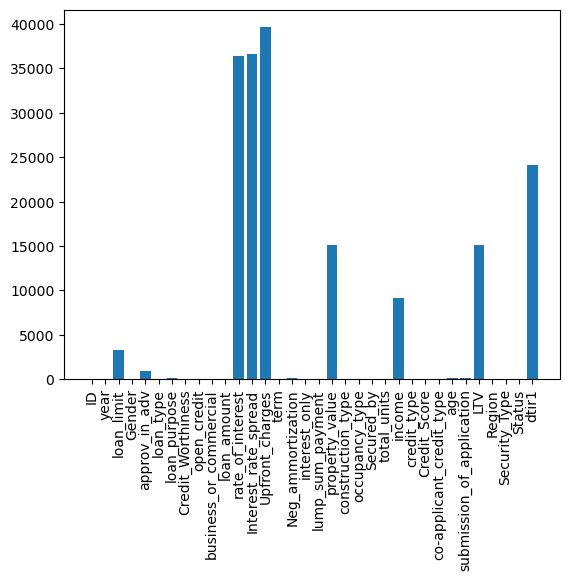

In [6]:
plt.bar(temp.feature, temp.null)
plt.xticks(rotation = 90)
plt.show()

In [7]:
missing_numerical = [feature for feature in df.columns if (df[feature].dtype != 'object' and df[feature].isnull().sum() > 0)]
missing_numerical

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

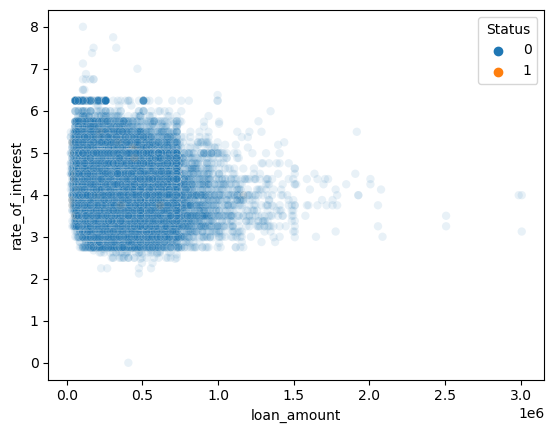

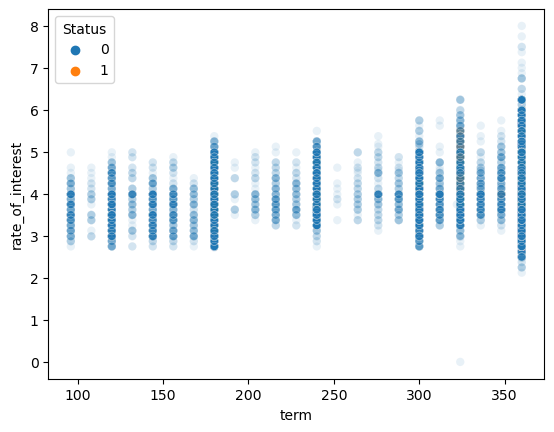

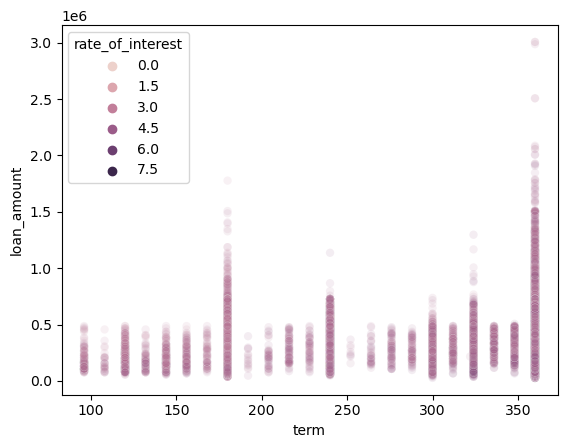

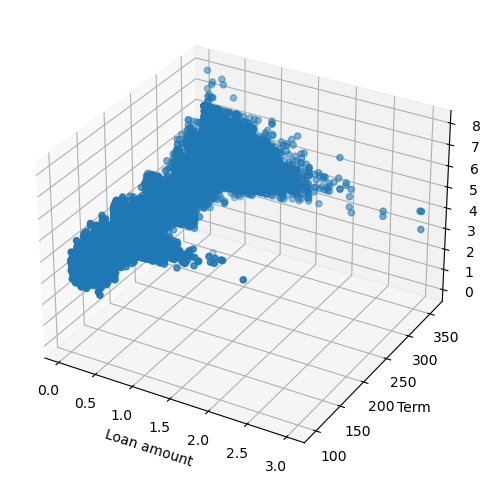

In [8]:
plot(df=df, x='loan_amount', y='rate_of_interest', hue='Status')
plot(df=df, x='term', y='rate_of_interest', hue='Status')
plot(df=df, x='term',y='loan_amount', hue='rate_of_interest')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.loan_amount, df.term, df.rate_of_interest)
plt.ylabel('Term')
plt.xlabel('Loan amount')
plt.show()

In [9]:
stats('rate_of_interest',df)

Mean:4.045475804367777
Median:3.99
Mode:0    3.99
Name: rate_of_interest, dtype: float64
Max:8.0
Min:0.0


In [10]:
df['rate_of_interest'].fillna(3.99, inplace = True)

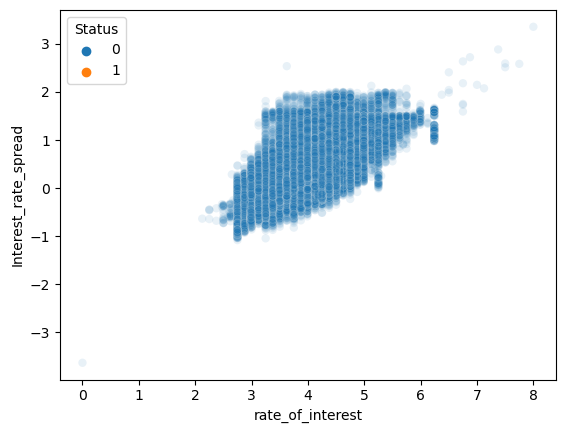

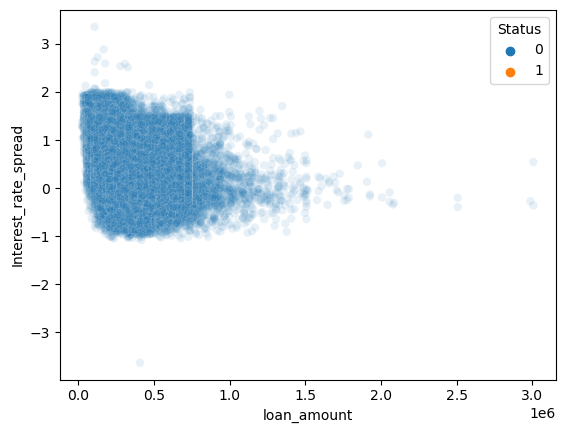

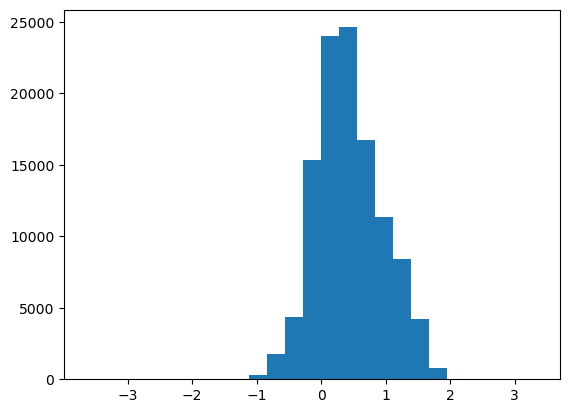

In [11]:
plot(df=df, x='rate_of_interest', y='Interest_rate_spread', hue='Status')

plot(df=df, x='loan_amount', y='Interest_rate_spread', hue='Status')

plt.hist(df['Interest_rate_spread'], bins=25)
plt.show()

In [12]:
stats('Interest_rate_spread',df)

Mean:0.4416556604868295
Median:0.3904
Mode:0   -0.028
Name: Interest_rate_spread, dtype: float64
Max:3.357
Min:-3.638


In [13]:
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].median(), inplace = True)

Mean:497893.46569640347
Median:418000.0
Mode:0    308000.0
Name: property_value, dtype: float64
Max:16508000.0
Min:8000.0


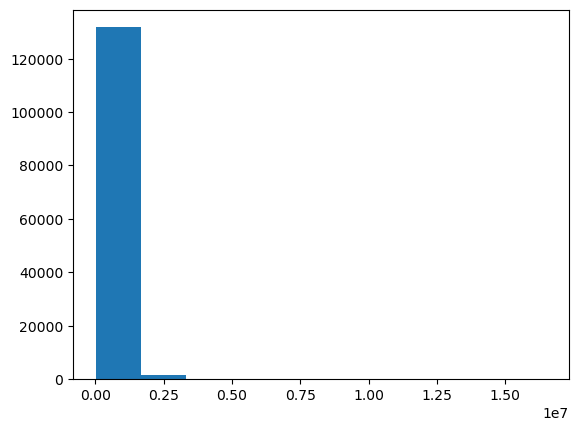

In [14]:
stats('property_value',df)

plt.hist(df['property_value'])
plt.show()

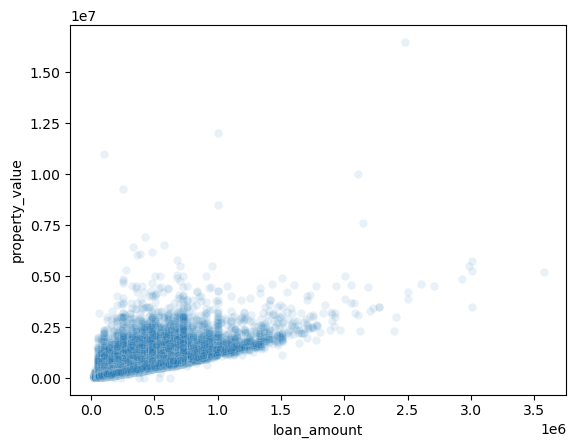

In [15]:
plot(df=df, x='loan_amount', y='property_value')

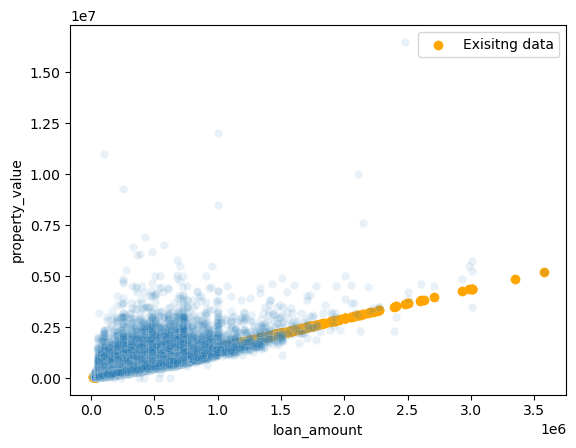

In [16]:
def fill_value(df,x_feature,y_feature):
    filler = LinearRegression()
    temp_df = df[~df[y_feature].isna()]
    x = temp_df[x_feature]
    y = temp_df[y_feature]
    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    filler.fit(x,y)
    X = np.array(df[x_feature]).reshape(-1,1)
    Y = filler.predict(X)

    plt.scatter(x=list(X.reshape(-1,1)), y=list(Y.reshape(-1,1)), c='orange', alpha=1)
    plt.legend(['Exisitng data', 'Linear Approximation'])
    plot(df=temp_df, x=x_feature, y=y_feature)
    return Y

property_filler = fill_value(df[['loan_amount','property_value']],'loan_amount','property_value')

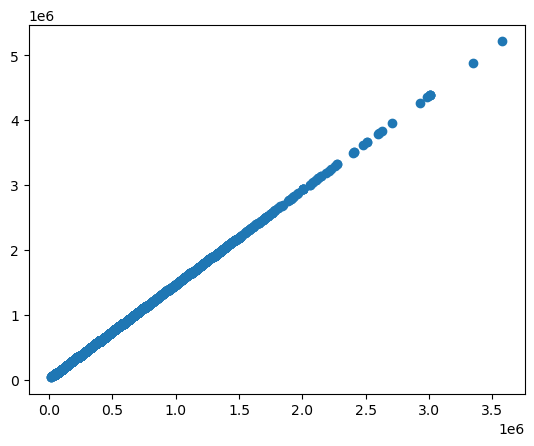

In [17]:
plt.scatter(df.loan_amount, property_filler)

In [18]:
df['property_filler'] = property_filler
df['property_value'].fillna(df['property_filler'], inplace=True)
df.drop('property_filler', axis=1,inplace=True)
stats('property_value',df)
df.head()

Mean:497692.3025814833
Median:418000.0
Mode:0    308000.0
Name: property_value, dtype: float64
Max:16508000.0
Min:8000.0


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,0.3904,NaN,360.0,not_neg,not_int,not_lpsm,118000.00000,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,0.3904,NaN,360.0,not_neg,not_int,lpsm,316486.42623,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.00000,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.00000,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.00000,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


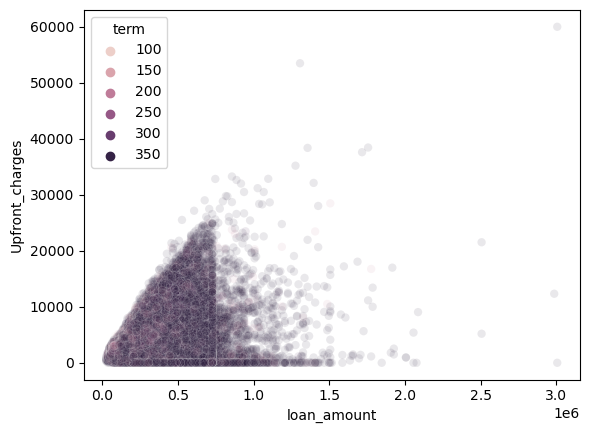

<Figure size 640x480 with 0 Axes>

In [19]:
plot(df=df,x='loan_amount',y='Upfront_charges',hue='term')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.loan_amount, df.Upfront_charges, df.term)
plt.show()

In [20]:
stats('term',df)

Mean:335.1365816899797
Median:360.0
Mode:0    360.0
Name: term, dtype: float64
Max:360.0
Min:96.0


In [21]:
df['term'].fillna(df['term'].median(), inplace = True)

In [22]:
stats('Upfront_charges',df)

Mean:3224.996126591334
Median:2596.45
Mode:0    0.0
Name: Upfront_charges, dtype: float64
Max:60000.0
Min:0.0


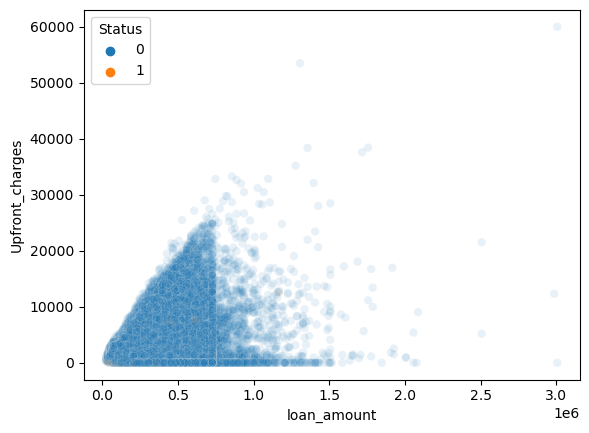

In [23]:
plot('loan_amount','Upfront_charges',df,'Status')

In [24]:
df['Upfront_charges'].fillna(df['Upfront_charges'].median(), inplace = True)

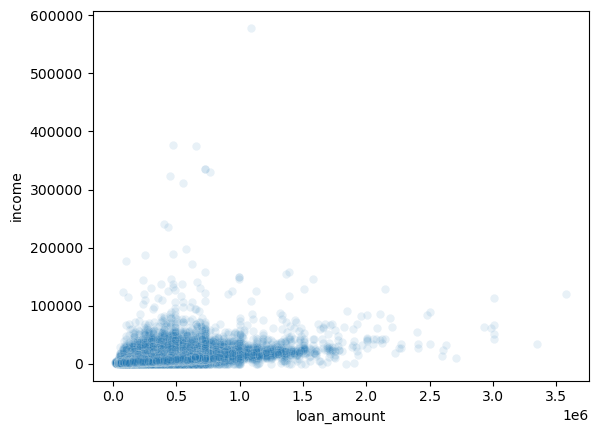

Mean:6957.338876146789
Median:5760.0
Mode:0    0.0
Name: income, dtype: float64
Max:578580.0
Min:0.0


In [25]:
plot(df=df, x='loan_amount', y='income')
stats('income', df)

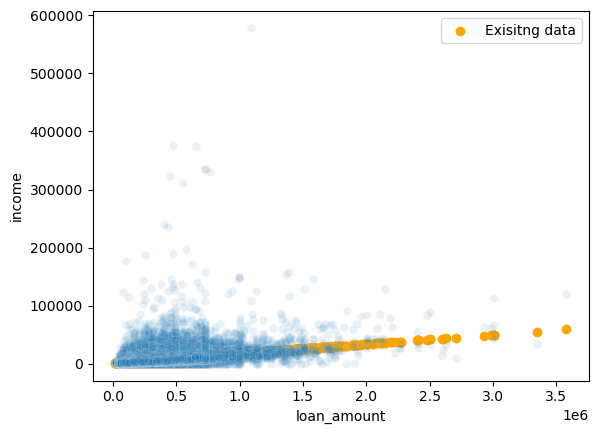

Mean:[6991.78365946]
Median:6435.8993541514565
Mode:0    [4990.698665104117]
dtype: object
Max:[59105.43557721]
Min:[1939.71943267]


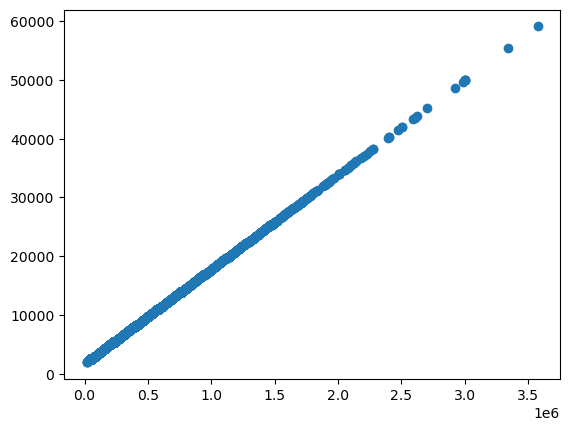

In [26]:
income_filler = fill_value(df[['loan_amount','income']],'loan_amount','income')
plt.scatter(df.loan_amount, pd.Series(list(income_filler)))
stats(pd.Series(list(income_filler)))

Mean:6991.783659455883
Median:5820.0
Mode:0    0.0
Name: income, dtype: float64
Max:578580.0
Min:0.0


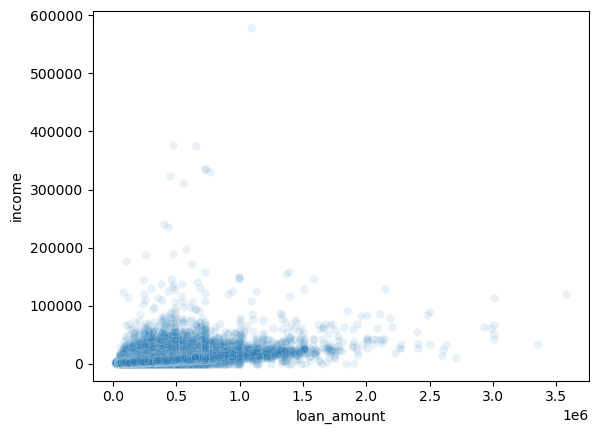

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,118000.00000,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,0.3904,2596.45,360.0,not_neg,not_int,lpsm,316486.42623,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.00000,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,2596.45,360.0,not_neg,not_int,not_lpsm,658000.00000,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.00000,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [27]:
df['income_filler'] = income_filler
df['income'].fillna(df['income_filler'], inplace=True)
df.drop('income_filler', axis=1,inplace=True)
stats('income',df)
plot(df=df, x='loan_amount',y='income')
df.head()

In [28]:
df[df['income']==0]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
42,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,466500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,6.945508e+05,sb,pr,home,1U,0.0,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
143,25033,2019,cf,Sex Not Available,nopre,type3,p4,l1,nopc,nob/c,686500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,1.014451e+06,sb,pr,home,1U,0.0,EQUI,836,EXP,45-54,to_inst,NaN,south,direct,1,NaN
208,25098,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,366500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,8.580000e+05,sb,pr,home,1U,0.0,EXP,638,CIB,45-54,to_inst,42.715618,North,direct,1,6.0
301,25191,2019,cf,Female,nopre,type2,p4,l1,nopc,b/c,636500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,9.417467e+05,sb,pr,home,1U,0.0,EQUI,710,EXP,45-54,not_inst,NaN,North,direct,1,NaN
409,25299,2019,cf,Sex Not Available,nopre,type2,p4,l1,nopc,b/c,516500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,7.672555e+05,sb,pr,home,1U,0.0,EQUI,847,EXP,65-74,to_inst,NaN,south,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147632,172522,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,516500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,7.672555e+05,sb,pr,home,1U,0.0,EQUI,628,EXP,35-44,not_inst,NaN,south,direct,1,NaN
147728,172618,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,326500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,4.909777e+05,sb,pr,home,1U,0.0,EQUI,847,EXP,35-44,not_inst,NaN,North,direct,1,NaN
148163,173053,2019,cf,Male,pre,type3,p4,l1,nopc,nob/c,646500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,9.562877e+05,sb,pr,home,1U,0.0,EQUI,835,EXP,45-54,not_inst,NaN,North,direct,1,NaN
148197,173087,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,266500,3.99,0.3904,2596.45,360.0,not_neg,not_int,not_lpsm,4.037320e+05,sb,pr,home,1U,0.0,EQUI,539,EXP,55-64,to_inst,NaN,North,direct,1,NaN


In [29]:
stats('LTV',df)
ltv_filler = df.loan_amount/df.property_value
df['ltv_filler'] = ltv_filler
df['LTV'].fillna(df['ltv_filler'], inplace=True)
df.drop('ltv_filler', axis=1,inplace=True)
stats('LTV',df)

Mean:72.74645733387138
Median:75.13586957
Mode:0    81.25
Name: LTV, dtype: float64
Max:7831.25
Min:0.967478198
Mean:65.42545003074454
Median:73.02631579
Mode:0    81.25
Name: LTV, dtype: float64
Max:7831.25
Min:0.41035973407337084


In [30]:
stats('dtir1',df)

Mean:37.73293242017198
Median:39.0
Mode:0    37.0
Name: dtir1, dtype: float64
Max:61.0
Min:5.0


In [31]:
df['dtir1'].fillna(df['dtir1'].median(), inplace = True)
stats('dtir1',df)

Mean:37.93850810519943
Median:39.0
Mode:0    39.0
Name: dtir1, dtype: float64
Max:61.0
Min:5.0


In [32]:
missing_numerical = [feature for feature in df.columns if (df[feature].dtype != 'object' and df[feature].isnull().sum() > 0)]
missing_numerical

[]

In [33]:
numerical = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

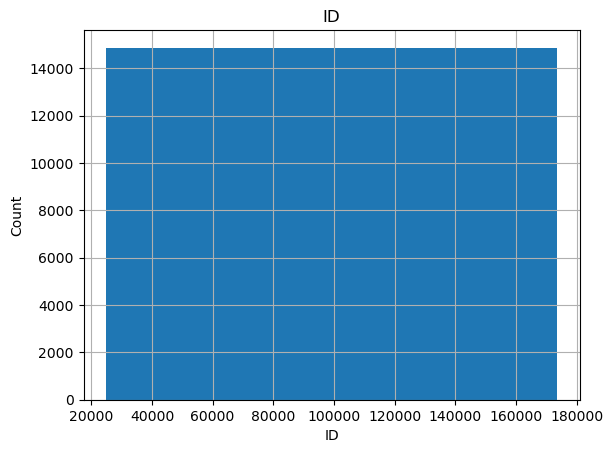

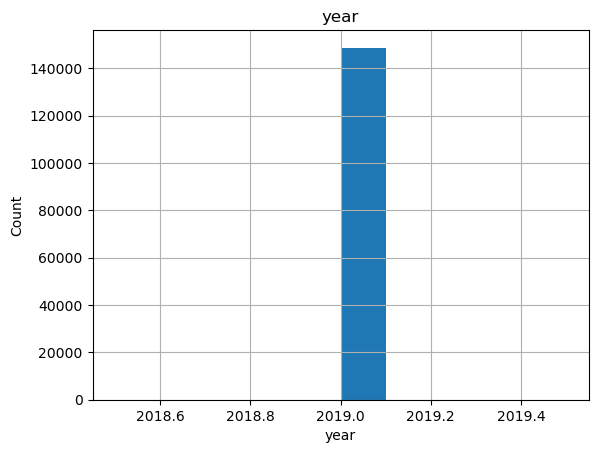

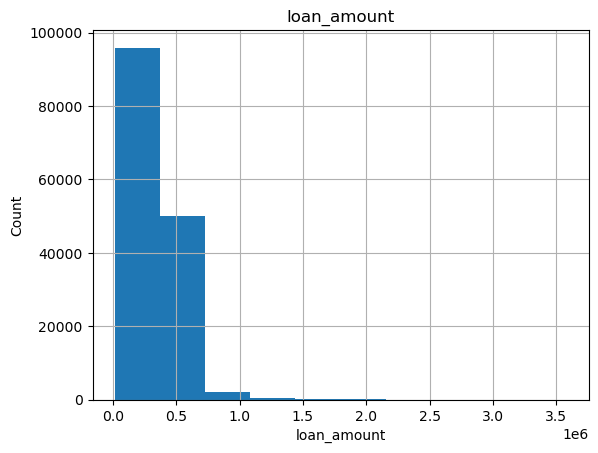

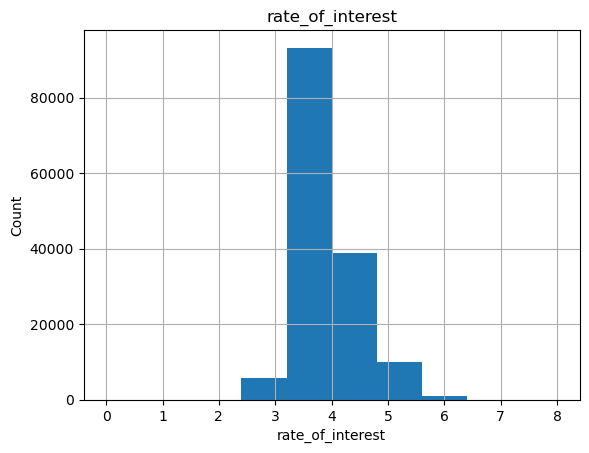

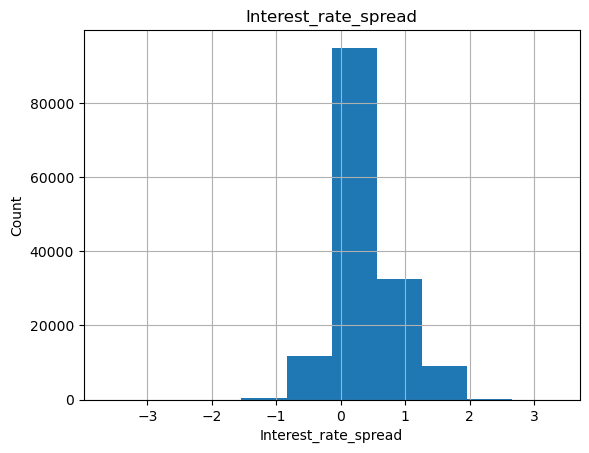

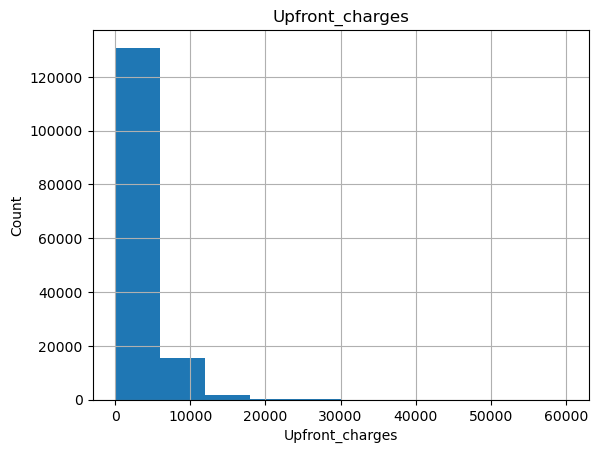

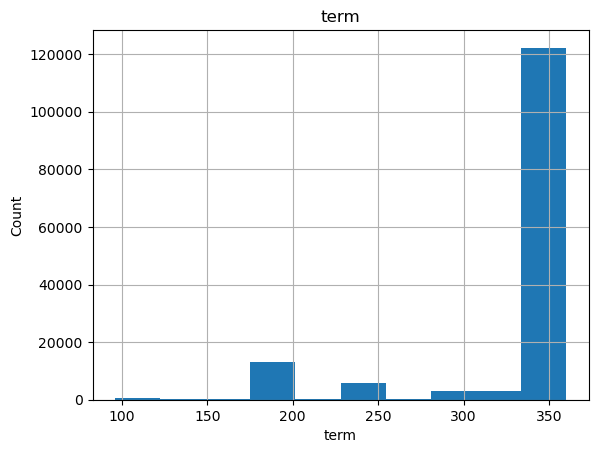

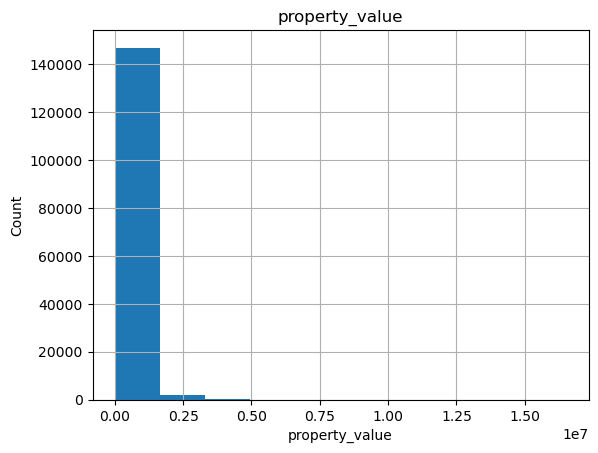

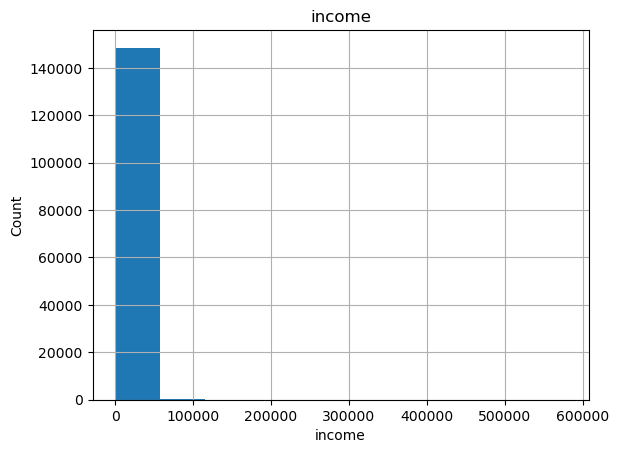

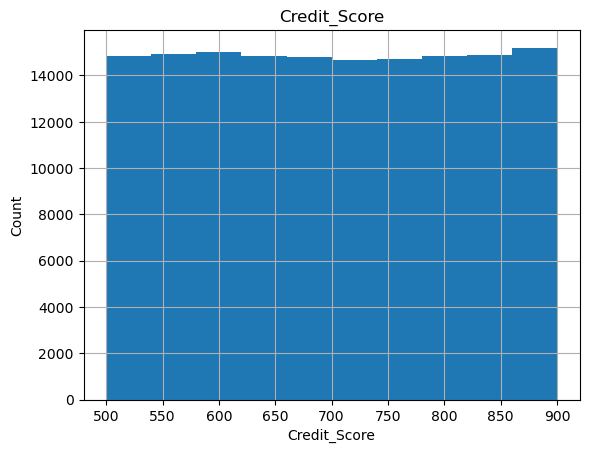

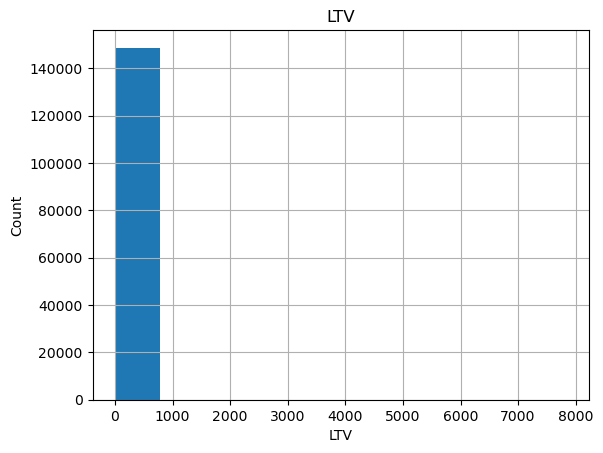

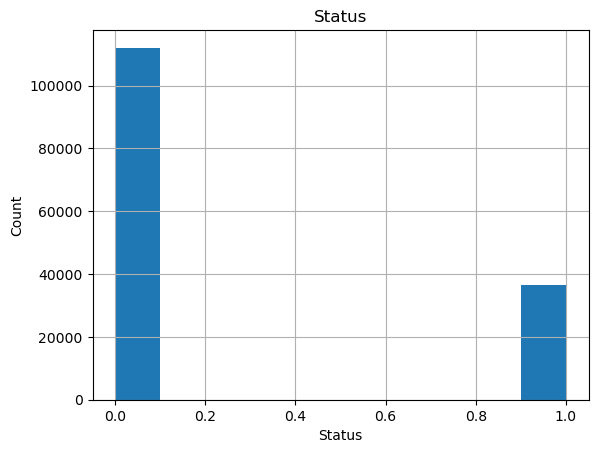

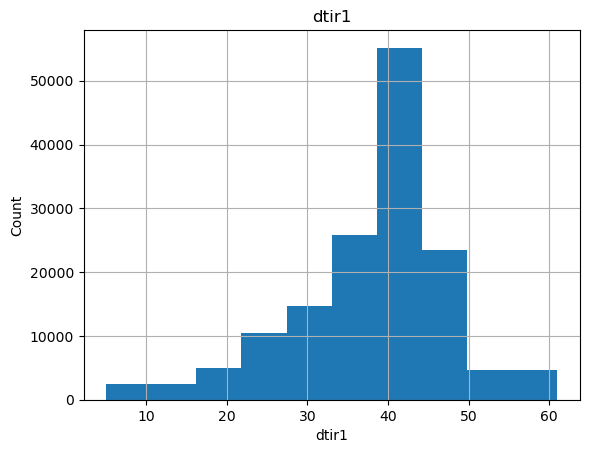

In [34]:
for feature in numerical:
    df[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [35]:
df.drop('year',axis=1,inplace=True)

In [36]:
numerical = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical

['ID',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

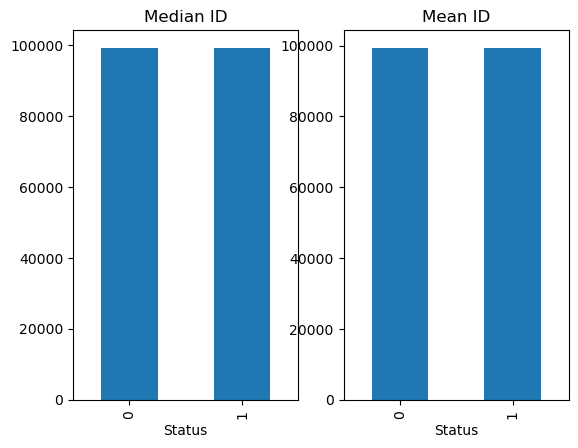

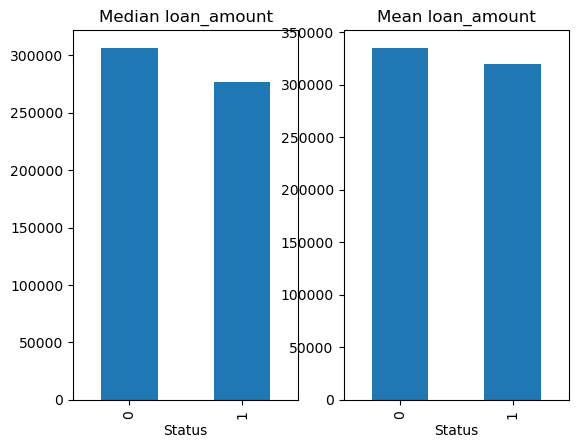

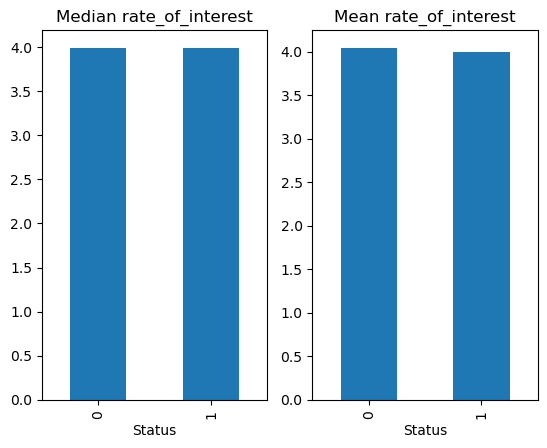

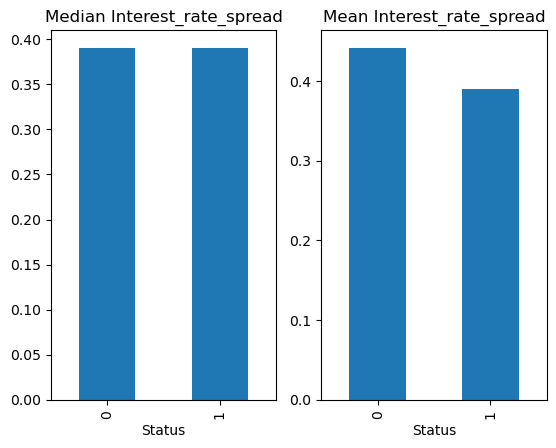

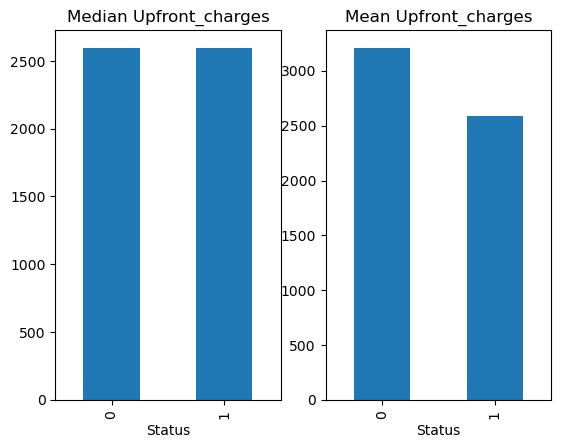

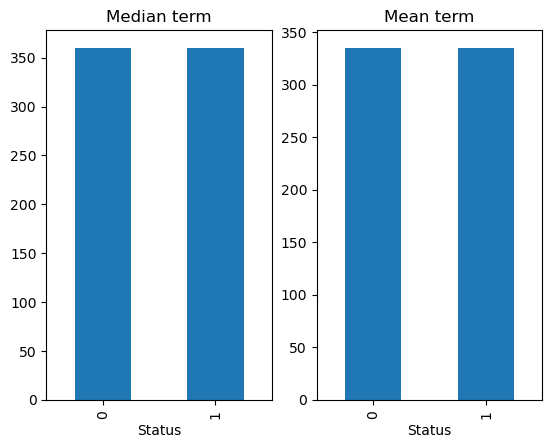

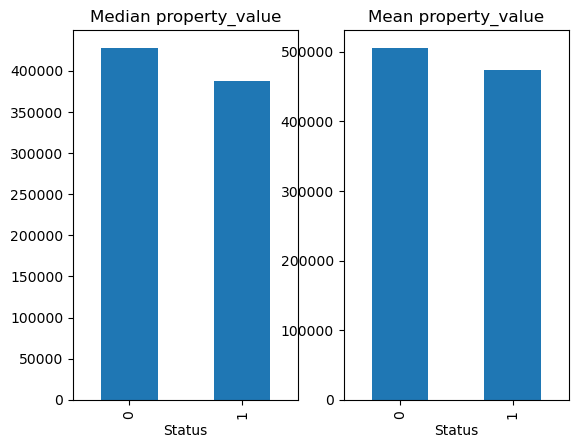

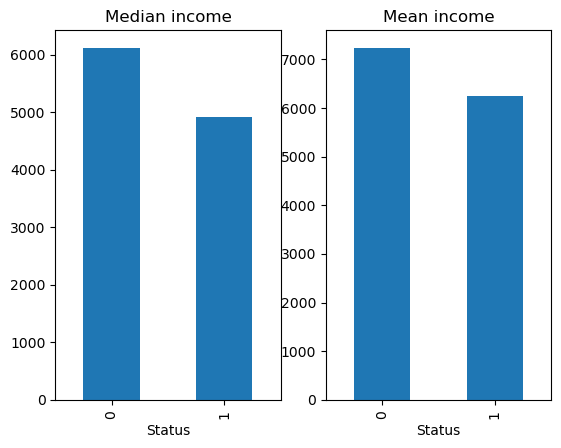

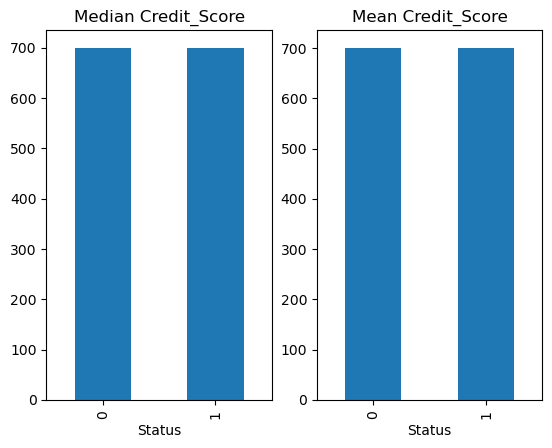

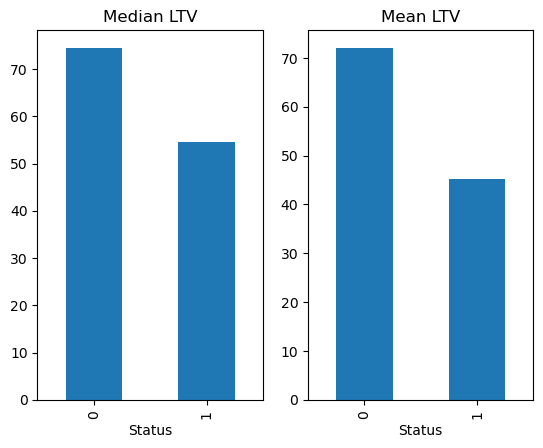

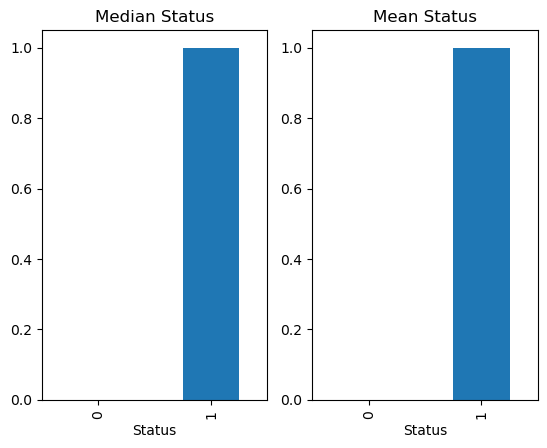

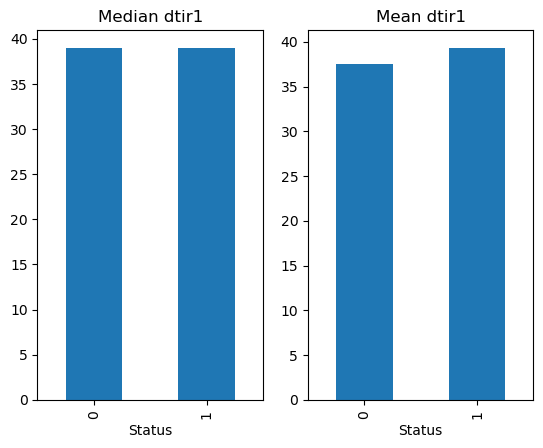

In [37]:
for i in numerical:
    plt.subplot(1, 2, 1)
    df.groupby('Status')[i].median().plot.bar()
    plt.title('Median '+i)

    plt.subplot(1, 2, 2)
    df.groupby('Status')[i].mean().plot.bar()
    plt.title('Mean '+i)

    plt.show()

In [38]:
feature_list = ['income','LTV']

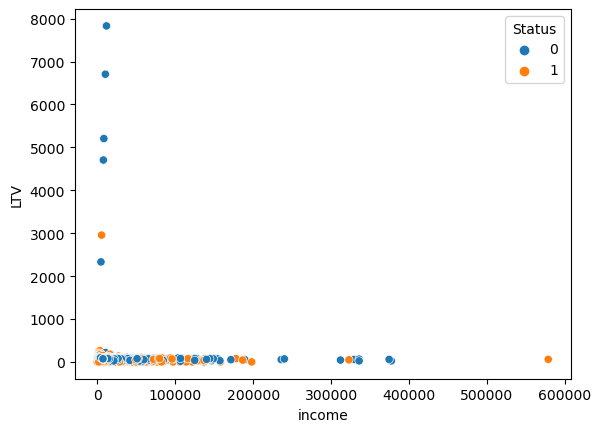

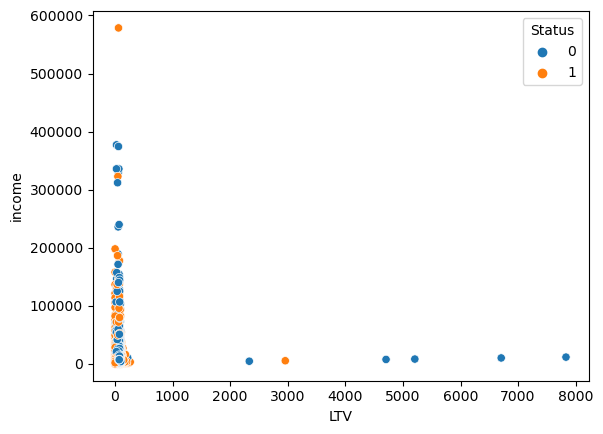

In [39]:
for i in feature_list:
    for j in feature_list:
        if i!=j:
            sns.scatterplot(x=df[i],y=df[j], hue = df['Status'])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

In [40]:
for i in numerical:
  print(i, ' -> ', len(df[abs(zscore(df[i]))>3.5]), ' items more than z-score 3.5')

ID  ->  0  items more than z-score 3.5
loan_amount  ->  911  items more than z-score 3.5
rate_of_interest  ->  566  items more than z-score 3.5
Interest_rate_spread  ->  27  items more than z-score 3.5
Upfront_charges  ->  1699  items more than z-score 3.5
term  ->  737  items more than z-score 3.5
property_value  ->  1607  items more than z-score 3.5
income  ->  1108  items more than z-score 3.5
Credit_Score  ->  0  items more than z-score 3.5
LTV  ->  10  items more than z-score 3.5
Status  ->  0  items more than z-score 3.5
dtir1  ->  0  items more than z-score 3.5


In [41]:
skewed = [i for i in numerical if len(df[abs(zscore(df[i]))>3.5])>50]
skewed

['loan_amount',
 'rate_of_interest',
 'Upfront_charges',
 'term',
 'property_value',
 'income']

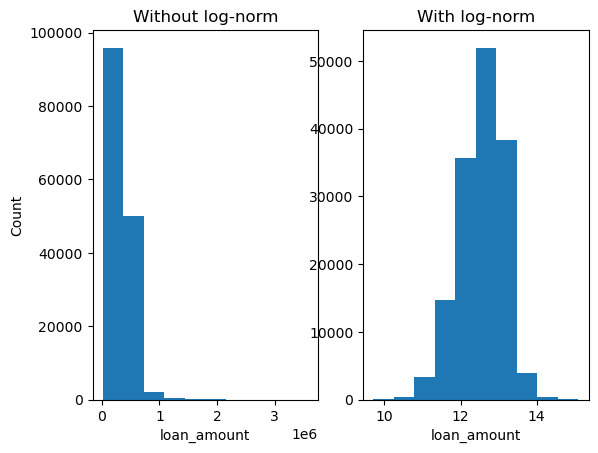

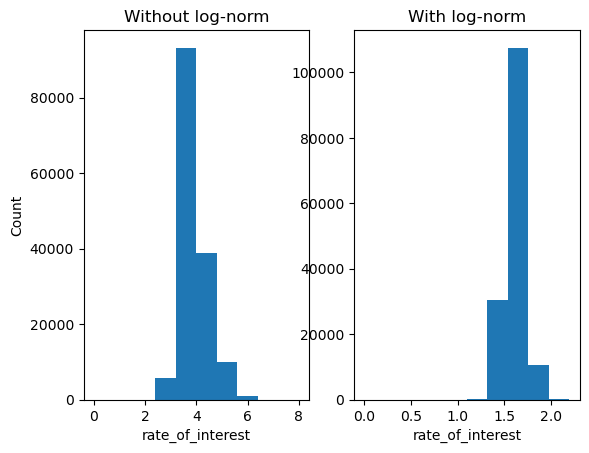

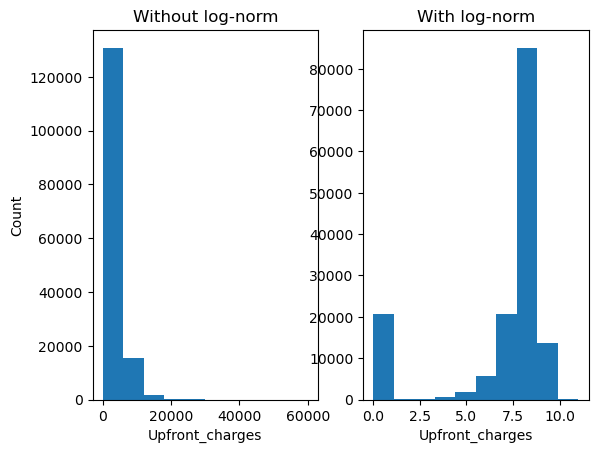

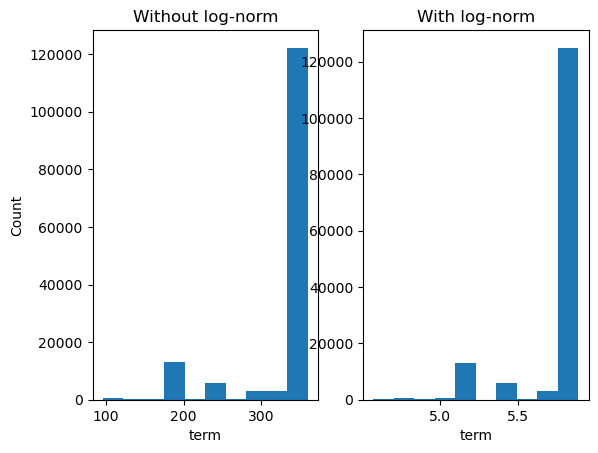

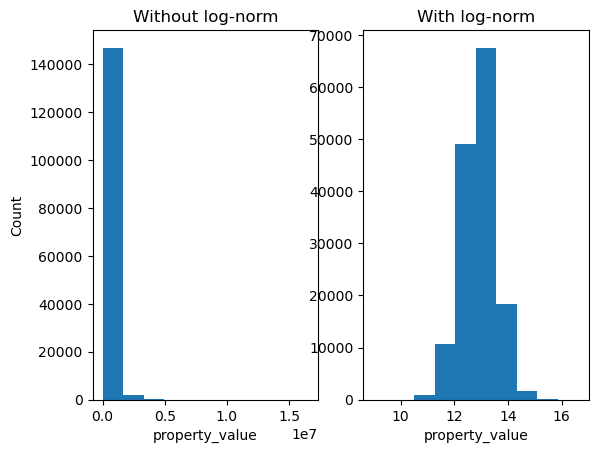

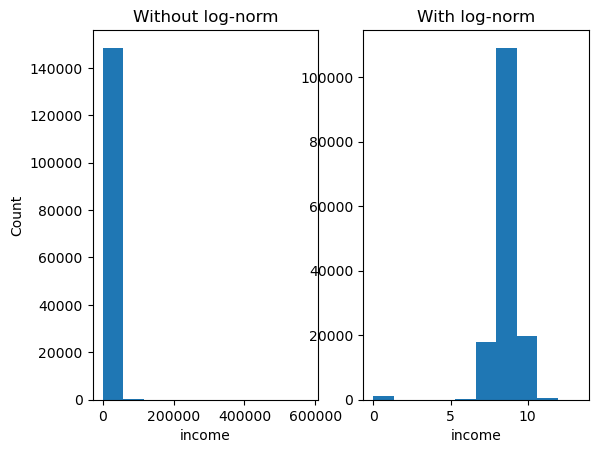

In [42]:
for i in skewed:
    plt.subplot(1, 2, 1)
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title("Without log-norm")

    plt.subplot(1, 2, 2)
    #We are adding 1 to all the values so we can log-transform, because log(0) will throw error
    plt.hist(np.log(df[i]+1))
    plt.xlabel(i)
    plt.title('With log-norm')

    plt.show()

In [43]:
print('Outliers Without log-norm  ',len(df[zscore((df['loan_amount']))>3.5]))
print('Outliers with log-norm  ',len(df[zscore(np.log(df['loan_amount']))>3.5]))

Outliers Without log-norm   911
Outliers with log-norm   28


In [44]:
skewed.remove('term')

In [45]:
#Need to define a function to bypass the zeros
def log_transform(x):
  if x == 0:
    return 0
  else:
    return np.log(x)

for i in skewed:
  df[i] = df[i].apply(log_transform)

for i in skewed:
  print(i, ' -> ', len(df[abs(zscore(df[i]))>3.5]), ' items more than z-score 3.5')

loan_amount  ->  177  items more than z-score 3.5
rate_of_interest  ->  296  items more than z-score 3.5
Upfront_charges  ->  1  items more than z-score 3.5
property_value  ->  249  items more than z-score 3.5
income  ->  1290  items more than z-score 3.5


In [46]:
for i in skewed:
  print(i, ' -> ', len(df[abs(zscore(df[i]))>4]), ' items more than z-score 4')

loan_amount  ->  38  items more than z-score 4
rate_of_interest  ->  24  items more than z-score 4
Upfront_charges  ->  0  items more than z-score 4
property_value  ->  48  items more than z-score 4
income  ->  1273  items more than z-score 4


In [47]:
df[abs(zscore(df['loan_amount']))<3.5]

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,11.665647,1.383791,0.3904,7.861900,360.0,not_neg,not_int,not_lpsm,11.678440,sb,pr,home,1U,7.461640,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,12.238056,1.383791,0.3904,7.861900,360.0,not_neg,not_int,lpsm,12.665036,sb,pr,home,1U,8.513185,EQUI,552,EXP,55-64,to_inst,0.652477,North,direct,1,39.0
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,12.915339,1.517323,0.2000,6.388561,360.0,neg_amm,not_int,not_lpsm,13.138237,sb,pr,home,1U,9.156940,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,13.031344,1.446919,0.6810,7.861900,360.0,not_neg,not_int,not_lpsm,13.396960,sb,pr,home,1U,9.382612,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,13.453823,1.386294,0.3042,0.000000,360.0,not_neg,not_int,not_lpsm,13.538439,sb,pr,home,1U,9.253400,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,12.986544,1.139434,0.2571,9.206332,180.0,not_neg,not_int,not_lpsm,13.317930,sb,pr,home,1U,8.969542,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,cf,Male,nopre,type1,p1,l1,nopc,nob/c,13.281928,1.646734,0.8544,0.000000,360.0,not_neg,not_int,not_lpsm,13.577253,sb,ir,home,4U,8.873468,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,cf,Male,nopre,type1,p4,l1,nopc,nob/c,13.009195,1.139434,0.0816,7.112034,180.0,not_neg,not_int,not_lpsm,13.498056,sb,pr,home,1U,8.839277,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,cf,Female,nopre,type1,p4,l1,nopc,nob/c,12.188418,1.252763,0.5824,8.371781,180.0,not_neg,not_int,not_lpsm,12.535376,sb,pr,home,1U,8.873468,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [48]:
for i in skewed:
  df = df[abs(zscore(df[i]))<3.5]

df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,11.665647,1.383791,0.3904,7.861900,360.0,not_neg,not_int,not_lpsm,11.678440,sb,pr,home,1U,7.461640,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,12.238056,1.383791,0.3904,7.861900,360.0,not_neg,not_int,lpsm,12.665036,sb,pr,home,1U,8.513185,EQUI,552,EXP,55-64,to_inst,0.652477,North,direct,1,39.0
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,12.915339,1.517323,0.2000,6.388561,360.0,neg_amm,not_int,not_lpsm,13.138237,sb,pr,home,1U,9.156940,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,13.031344,1.446919,0.6810,7.861900,360.0,not_neg,not_int,not_lpsm,13.396960,sb,pr,home,1U,9.382612,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,13.453823,1.386294,0.3042,0.000000,360.0,not_neg,not_int,not_lpsm,13.538439,sb,pr,home,1U,9.253400,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [49]:
len(df)

146730

In [50]:
categorical = [i for i in df.columns if df[i].dtype == 'object']
categorical

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [51]:
for i in categorical:
    print(i,'\t\t',df[i].nunique(),'\t\t',df[i].unique())

loan_limit 		 2 		 ['cf' nan 'ncf']
Gender 		 4 		 ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv 		 2 		 ['nopre' 'pre' nan]
loan_type 		 3 		 ['type1' 'type2' 'type3']
loan_purpose 		 4 		 ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness 		 2 		 ['l1' 'l2']
open_credit 		 2 		 ['nopc' 'opc']
business_or_commercial 		 2 		 ['nob/c' 'b/c']
Neg_ammortization 		 2 		 ['not_neg' 'neg_amm' nan]
interest_only 		 2 		 ['not_int' 'int_only']
lump_sum_payment 		 2 		 ['not_lpsm' 'lpsm']
construction_type 		 2 		 ['sb' 'mh']
occupancy_type 		 3 		 ['pr' 'sr' 'ir']
Secured_by 		 2 		 ['home' 'land']
total_units 		 4 		 ['1U' '2U' '3U' '4U']
credit_type 		 4 		 ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type 		 2 		 ['CIB' 'EXP']
age 		 7 		 ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application 		 2 		 ['to_inst' 'not_inst' nan]
Region 		 4 		 ['south' 'North' 'central' 'North-East']
Security_Type 		 2 		 ['direct' 'Indriect']


In [52]:
for i in categorical:
    if df[i].nunique() == 2:
        df[i].replace([i for i in df[i].unique() if not pd.isna(i)],[0,1],inplace=True)
for i in categorical:
    print(i,'\t\t',df[i].nunique(),'\t\t',df[i].unique())

loan_limit 		 2 		 [ 0. nan  1.]
Gender 		 4 		 ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv 		 2 		 [ 0.  1. nan]
loan_type 		 3 		 ['type1' 'type2' 'type3']
loan_purpose 		 4 		 ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness 		 2 		 [0 1]
open_credit 		 2 		 [0 1]
business_or_commercial 		 2 		 [0 1]
Neg_ammortization 		 2 		 [ 0.  1. nan]
interest_only 		 2 		 [0 1]
lump_sum_payment 		 2 		 [0 1]
construction_type 		 2 		 [0 1]
occupancy_type 		 3 		 ['pr' 'sr' 'ir']
Secured_by 		 2 		 [0 1]
total_units 		 4 		 ['1U' '2U' '3U' '4U']
credit_type 		 4 		 ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type 		 2 		 [0 1]
age 		 7 		 ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application 		 2 		 [ 0.  1. nan]
Region 		 4 		 ['south' 'North' 'central' 'North-East']
Security_Type 		 2 		 [0 1]


In [53]:
def calc_mean_age(age_range):
  # for age >74 we will replace it as 80 directly
  # for age <25 we will replace it as 20 directly

  if pd.isna(age_range):
    return np.nan

  if age_range == '>74':
    return 80

  if age_range == '<25':
    return 20

  age = age_range.split('-')
  age = [int(i) for i in age]
  mean_age = int(sum(age)/len(age))
  return mean_age

In [54]:
df['age'] = df['age'].apply(calc_mean_age)
df.age

0         29.0
1         59.0
2         39.0
3         49.0
4         29.0
          ... 
148665    59.0
148666    29.0
148667    49.0
148668    59.0
148669    49.0
Name: age, Length: 146730, dtype: float64

In [55]:
df['total_units'] = df['total_units'].apply(lambda x: int(x[0]) )

In [56]:
df['total_units'].unique()

array([1, 2, 3, 4], dtype=int64)

In [57]:
# Handling missing categorical values
df['Gender'].replace(['Sex Not Available'],[np.nan],inplace=True)

In [58]:
for i in categorical:
  if df[i].isnull().sum() > 0:
    print(i, df[i].unique(), df[i].isnull().sum(), sep='\t\t')

loan_limit		[ 0. nan  1.]		3306
Gender		[nan 'Male' 'Joint' 'Female']		37105
approv_in_adv		[ 0.  1. nan]		897
loan_purpose		['p1' 'p4' 'p3' 'p2' nan]		134
Neg_ammortization		[ 0.  1. nan]		118
age		[29. 59. 39. 49. 69. 80. 20. nan]		197
submission_of_application		[ 0.  1. nan]		197


In [59]:
len(df)

146730

In [60]:
df['age'].mode()

0    49.0
Name: age, dtype: float64

In [61]:
df['age'].fillna(49.0, inplace=True)

In [62]:
df['submission_of_application'].mode()

0    0.0
Name: submission_of_application, dtype: float64

In [63]:
df['submission_of_application'].fillna(0,inplace=True)

In [64]:
df['loan_purpose'].mode()

0    p3
Name: loan_purpose, dtype: object

In [65]:
df['loan_purpose'].fillna('p3',inplace=True)

In [66]:
df['Neg_ammortization'].mode()

0    0.0
Name: Neg_ammortization, dtype: float64

In [67]:
df['Neg_ammortization'].fillna(0.0, inplace=True)
df['Neg_ammortization'].replace([0.0,1.0],[0,1],inplace=True)

In [68]:
df['loan_limit'].value_counts()

0.0    133686
1.0      9738
Name: loan_limit, dtype: int64

In [69]:
df['loan_limit'].isnull().sum()

3306

In [70]:
df.columns

Index(['ID', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

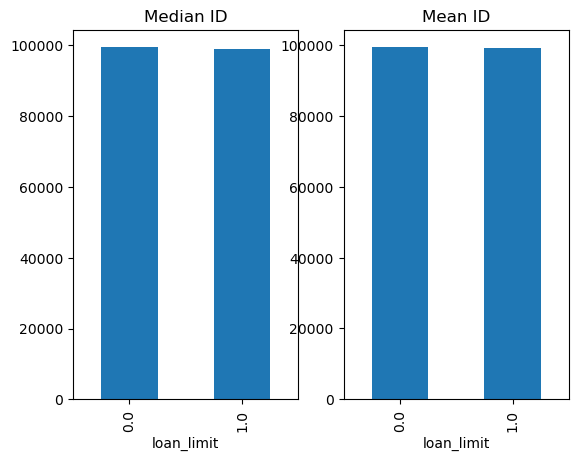

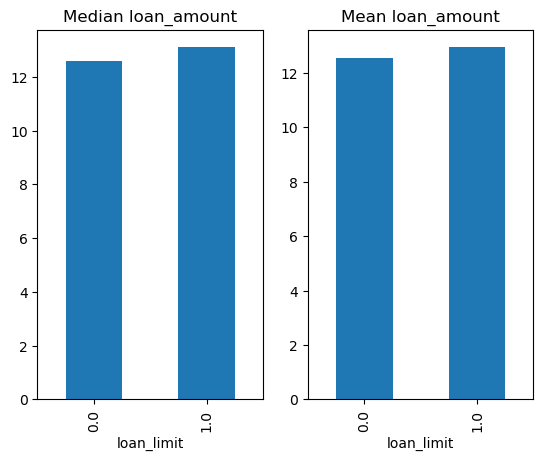

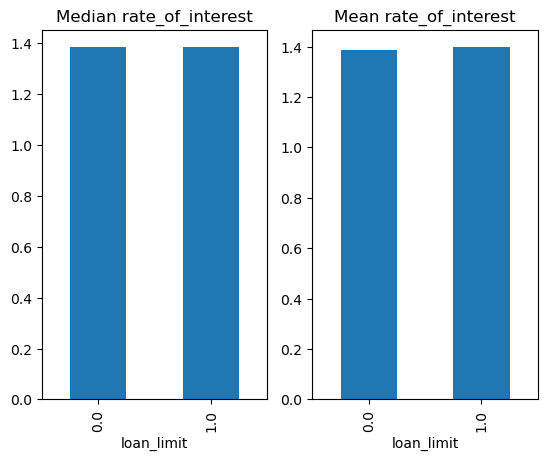

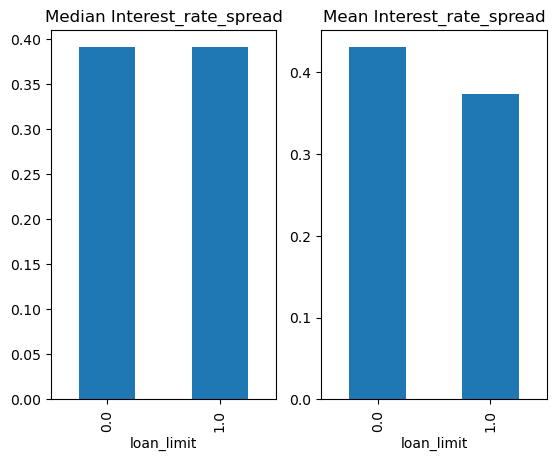

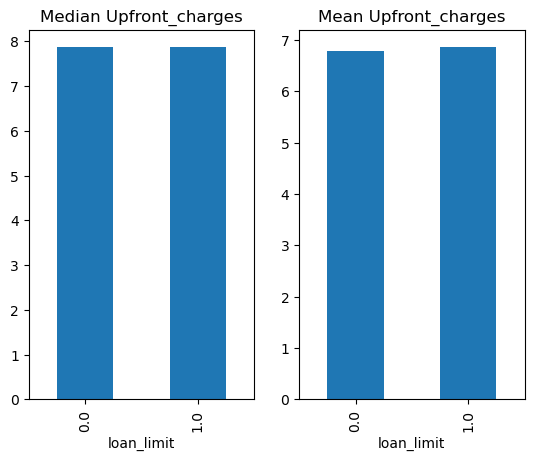

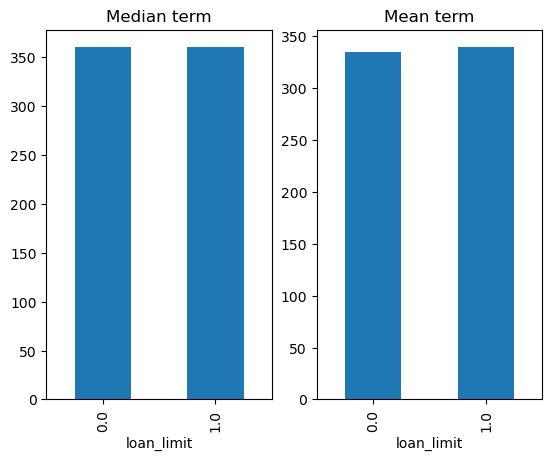

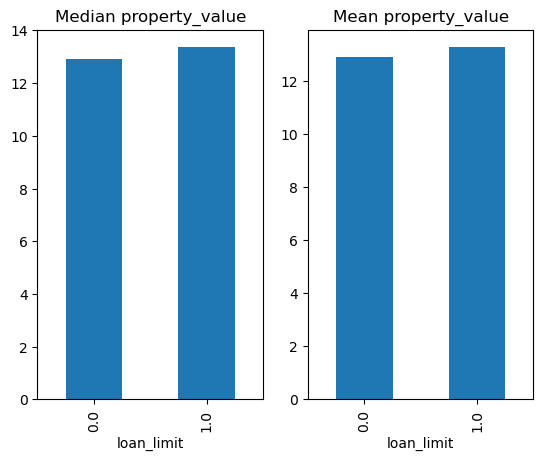

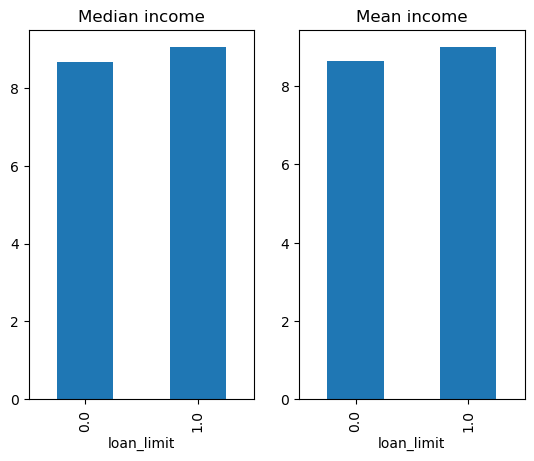

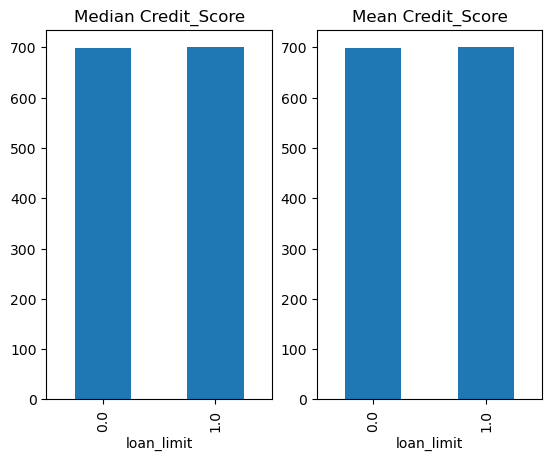

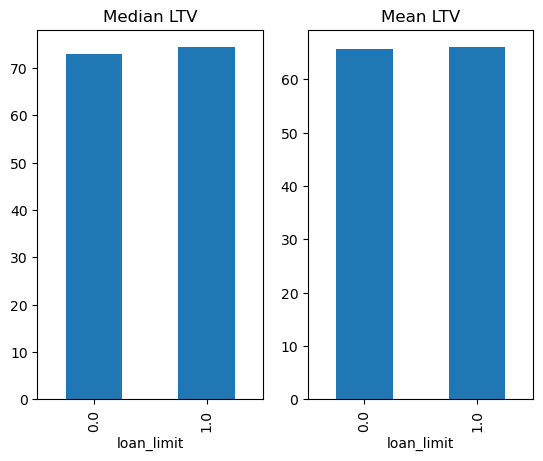

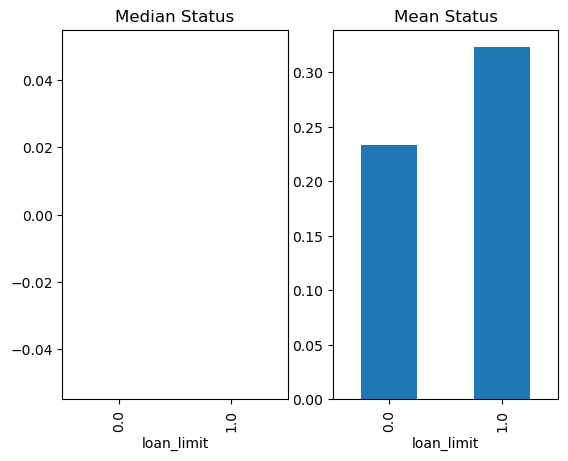

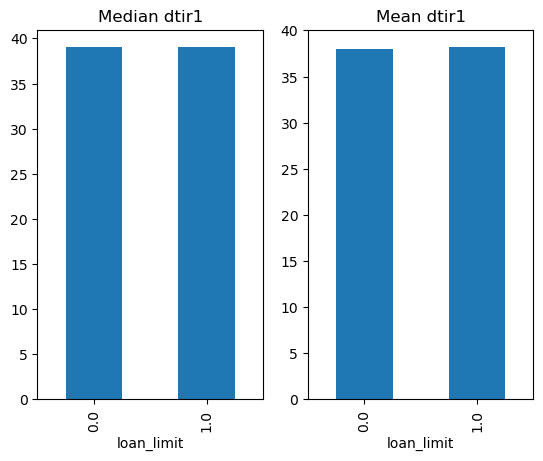

In [71]:
for i in numerical:
    plt.subplot(1, 2, 1)
    df.groupby('loan_limit')[i].median().plot.bar()
    plt.title('Median '+i)

    plt.subplot(1, 2, 2)
    df.groupby('loan_limit')[i].mean().plot.bar()
    plt.title('Mean '+i)

    plt.show()

In [72]:
def fill_cat_values(df, input, target):
    filler = LogisticRegression()
    temp_df = df[~df[target].isna()]
    x = temp_df[input]
    y = temp_df[target]
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    y = np.array(y).reshape(-1,1)
    filler.fit(x,y)
    X = np.array(df[input])
    Y = filler.predict(X)

    for i in input:
      plt.subplot(1, 2, 1)
      df.groupby(target)[i].median().plot.bar()
      plt.title('Median '+i)

      plt.subplot(1, 2, 2)
      df.groupby(target)[i].mean().plot.bar()
      plt.title('Mean '+i)

      plt.show()

    return Y

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


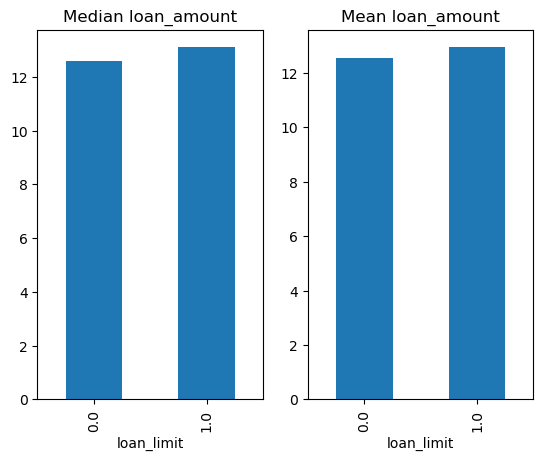

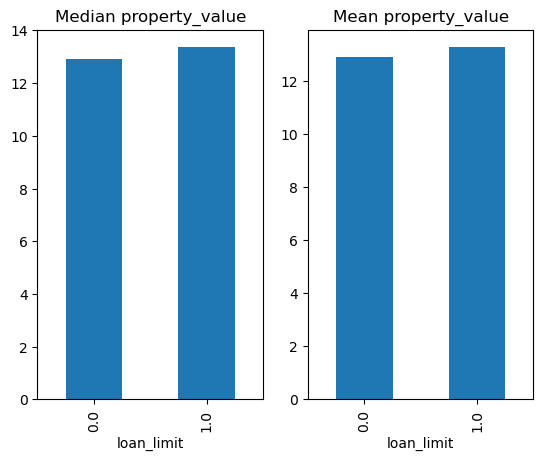

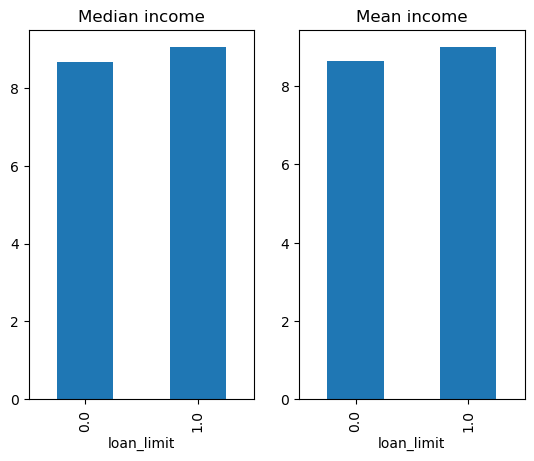

In [73]:
loan_limit_filler = fill_cat_values(df,['loan_amount', 'property_value', 'income'],'loan_limit')

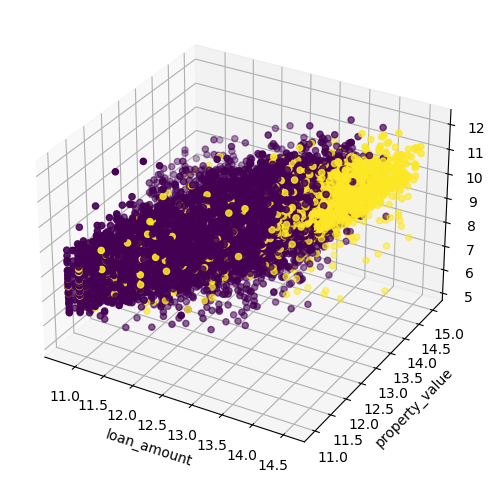

In [74]:
fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['loan_amount'], df['property_value'],df['income'], c=df['loan_limit'], marker='o')
ax.set_xlabel('loan_amount')
ax.set_ylabel('property_value')
ax.set_zlabel('income')

plt.show()

In [75]:
df['loan_limit_filler'] = loan_limit_filler
df['loan_limit'].fillna(df['loan_limit_filler'], inplace=True)
df.drop('loan_limit_filler', axis=1,inplace=True)
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,0.0,NaN,0.0,type1,p1,0,0,0,11.665647,1.383791,0.3904,7.861900,360.0,0.0,0,0,11.678440,0,pr,0,1,7.461640,EXP,758,0,29.0,0.0,98.728814,south,0,1,45.0
1,24891,0.0,Male,0.0,type2,p1,0,0,1,12.238056,1.383791,0.3904,7.861900,360.0,0.0,0,1,12.665036,0,pr,0,1,8.513185,EQUI,552,1,59.0,0.0,0.652477,North,0,1,39.0
2,24892,0.0,Male,1.0,type1,p1,0,0,0,12.915339,1.517323,0.2000,6.388561,360.0,1.0,0,0,13.138237,0,pr,0,1,9.156940,EXP,834,0,39.0,0.0,80.019685,south,0,0,46.0
3,24893,0.0,Male,0.0,type1,p4,0,0,0,13.031344,1.446919,0.6810,7.861900,360.0,0.0,0,0,13.396960,0,pr,0,1,9.382612,EXP,587,0,49.0,1.0,69.376900,North,0,0,42.0
4,24894,0.0,Joint,1.0,type1,p1,0,0,0,13.453823,1.386294,0.3042,0.000000,360.0,0.0,0,0,13.538439,0,pr,0,1,9.253400,CRIF,602,1,29.0,1.0,91.886544,North,0,0,39.0


0    0.0
Name: approv_in_adv, dtype: float64

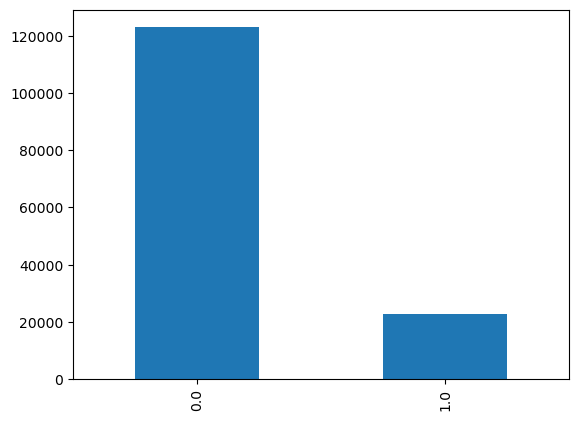

In [76]:
df['approv_in_adv'].value_counts().plot(kind='bar')
df['approv_in_adv'].mode()

In [77]:
df['approv_in_adv'].fillna(0.0, inplace=True)
df['approv_in_adv'].replace([0.0,1.0],[0,1],inplace=True)

<Axes: >

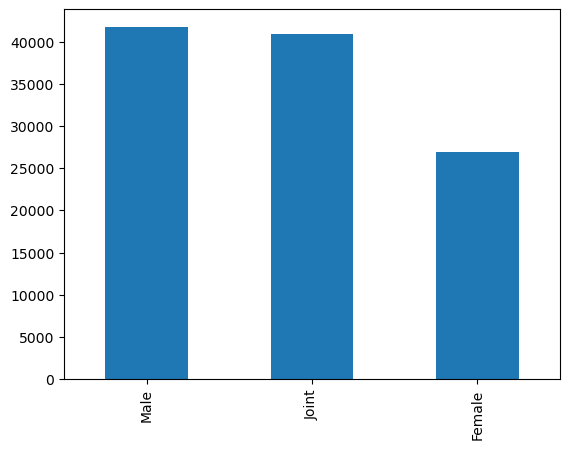

In [78]:
df['Gender'].value_counts().plot(kind='bar')

In [79]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [80]:
df['Gender'].fillna('Male',inplace=True)

In [81]:
# Standardize numerical variables
df[numerical].head()

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,11.665647,1.383791,0.3904,7.861900,360.0,11.678440,7.461640,758,98.728814,1,45.0
1,24891,12.238056,1.383791,0.3904,7.861900,360.0,12.665036,8.513185,552,0.652477,1,39.0
2,24892,12.915339,1.517323,0.2000,6.388561,360.0,13.138237,9.156940,834,80.019685,0,46.0
3,24893,13.031344,1.446919,0.6810,7.861900,360.0,13.396960,9.382612,587,69.376900,0,42.0
4,24894,13.453823,1.386294,0.3042,0.000000,360.0,13.538439,9.253400,602,91.886544,0,39.0


In [82]:
Y = df['Status']
df.drop(['Status','ID'], axis=1, inplace=True)

In [83]:
numerical = [feature for feature in df.columns if (df[feature].dtype != 'object' and df[feature].nunique()>5)]
numerical

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'dtir1']

In [84]:
numerical.append('total_units')
numerical

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'dtir1',
 'total_units']

In [85]:
scaler = StandardScaler()
df_eng = pd.DataFrame()
df_eng[numerical] = scaler.fit_transform(df[numerical])
df_eng.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,total_units
0,-1.573884,-0.022305,-0.084143,0.376539,0.427266,-2.072706,-1.953276,0.502297,-1.503302,1.191284,0.727455,-0.109396
1,-0.565508,-0.022305,-0.084143,0.376539,0.427266,-0.436120,-0.240337,-1.275253,0.601389,-2.349279,0.102949,-0.109396
2,0.627619,1.098525,-0.511399,-0.137704,0.427266,0.348837,0.808322,1.158093,-0.801738,0.515883,0.831540,-0.109396
3,0.831977,0.507574,0.567962,0.376539,0.427266,0.778013,1.175936,-0.973242,-0.100175,0.131678,0.415202,-0.109396
4,1.576231,-0.001294,-0.277575,-2.367520,0.427266,1.012700,0.965453,-0.843809,-1.503302,0.944277,0.102949,-0.109396


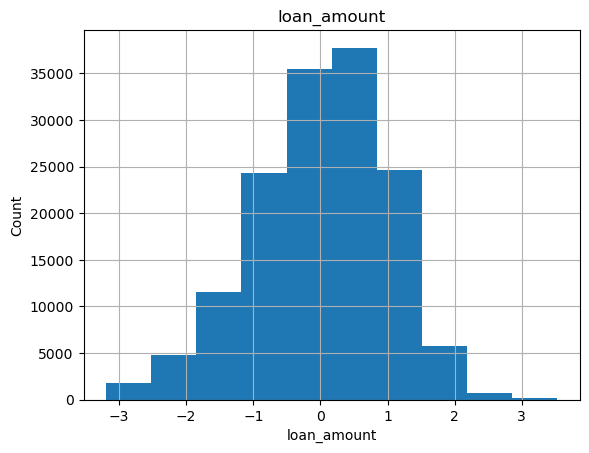

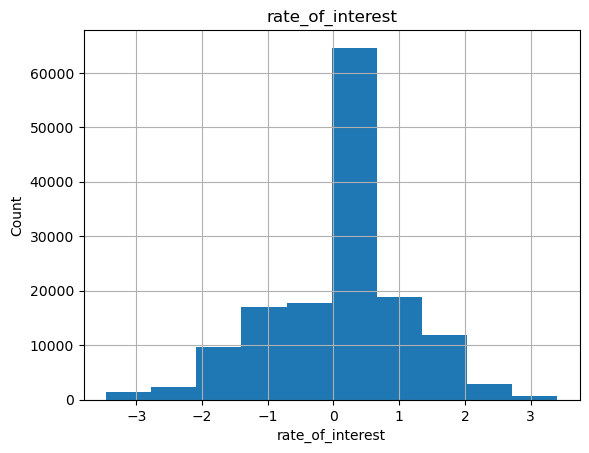

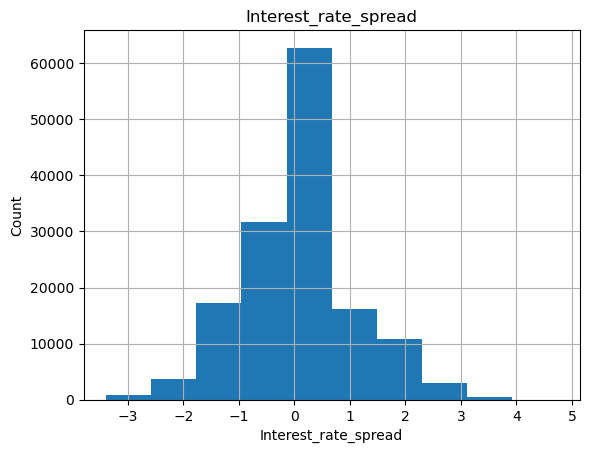

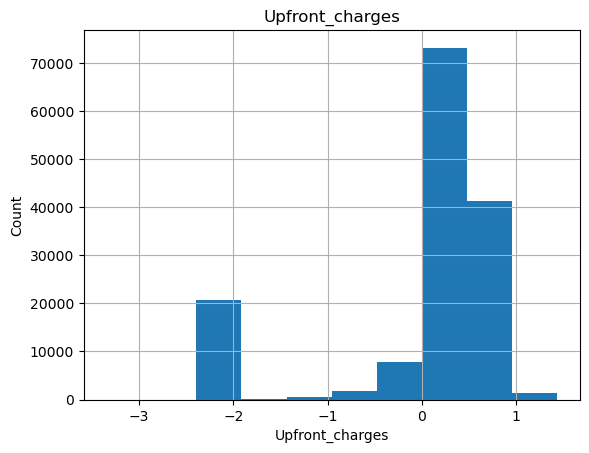

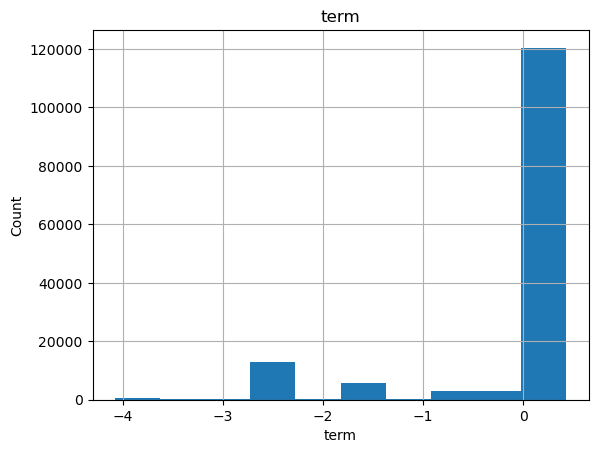

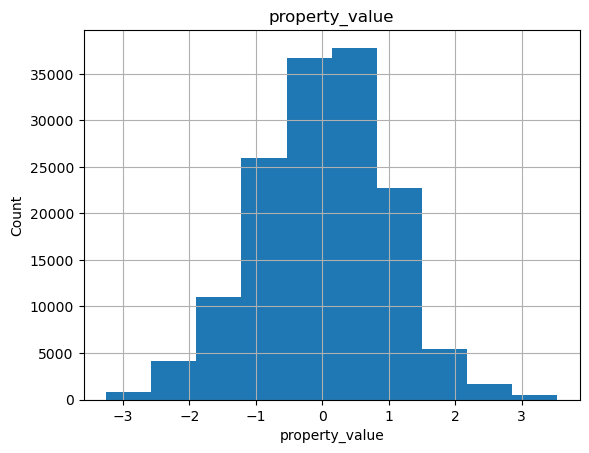

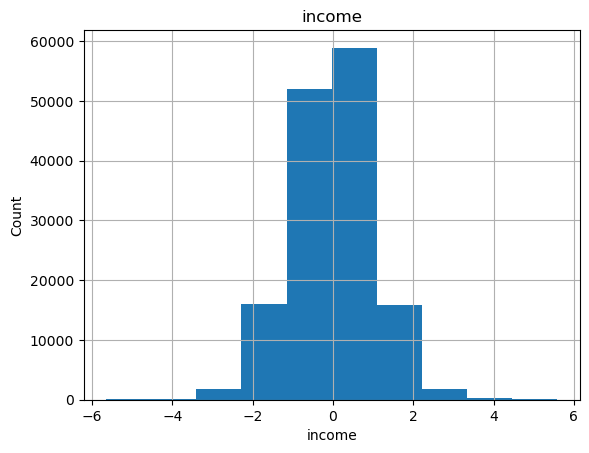

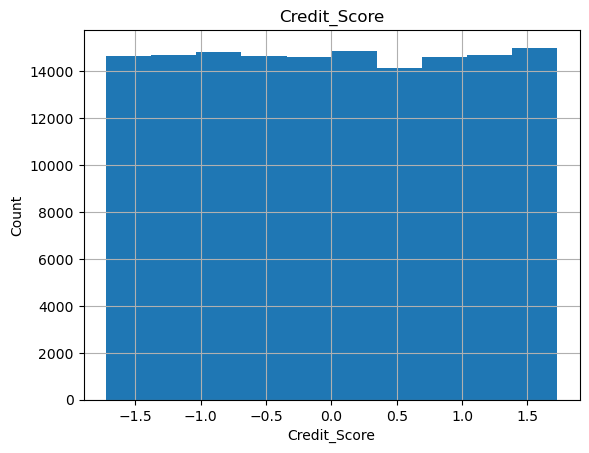

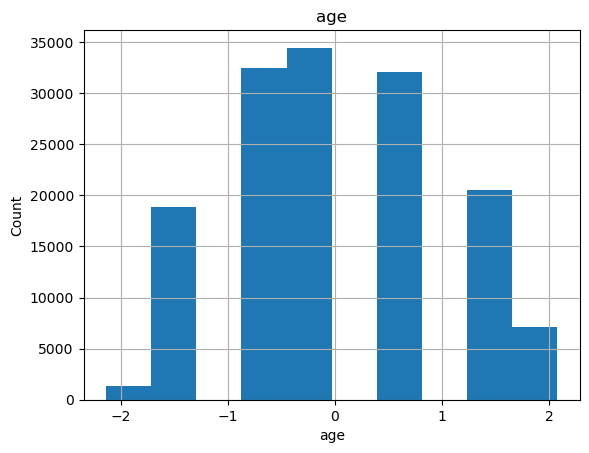

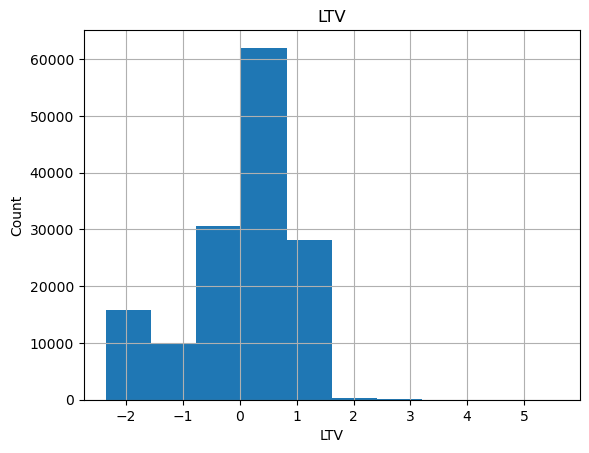

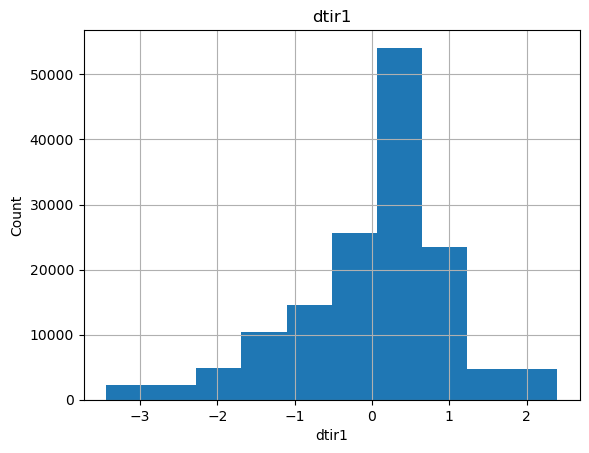

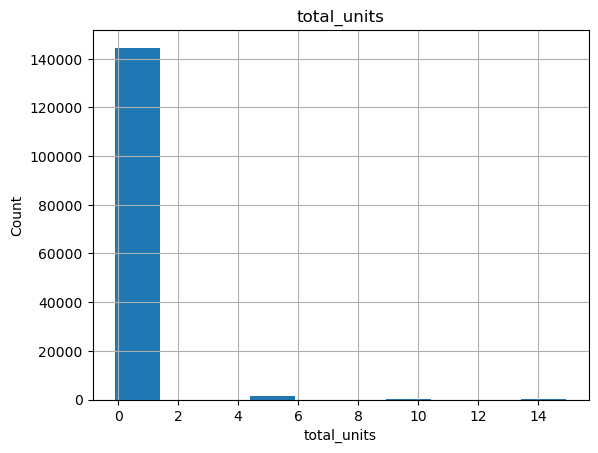

In [86]:
for feature in numerical:
    df_eng[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [87]:
# Encoding Categorical data

to_encode = [i for i in df.columns if df[i].dtype =='object']
to_encode

['Gender',
 'loan_type',
 'loan_purpose',
 'occupancy_type',
 'credit_type',
 'Region']

In [88]:
for i in to_encode:
  print(i, df[i].nunique(), df[i].unique(), sep='\t\t')

Gender		3		['Male' 'Joint' 'Female']
loan_type		3		['type1' 'type2' 'type3']
loan_purpose		4		['p1' 'p4' 'p3' 'p2']
occupancy_type		3		['pr' 'sr' 'ir']
credit_type		4		['EXP' 'EQUI' 'CRIF' 'CIB']
Region		4		['south' 'North' 'central' 'North-East']


In [89]:
df.reset_index(drop=True,inplace=True)

In [90]:
enc = OneHotEncoder(drop='first')
enc_data = pd.DataFrame(enc.fit_transform(df[['Gender', 'loan_type', 'loan_purpose', 'occupancy_type','credit_type','Region']]).toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146726,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
encoded_df = df.join(enc_data)
encoded_df.drop(to_encode,axis=1,inplace=True)
encoded_df

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,total_units,income,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Security_Type,dtir1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0,0,0,11.665647,1.383791,0.3904,7.861900,360.0,0.0,0,0,11.678440,0,0,1,7.461640,758,0,29.0,0.0,98.728814,0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0,0,1,12.238056,1.383791,0.3904,7.861900,360.0,0.0,0,1,12.665036,0,0,1,8.513185,552,1,59.0,0.0,0.652477,0,39.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0,0,0,12.915339,1.517323,0.2000,6.388561,360.0,1.0,0,0,13.138237,0,0,1,9.156940,834,0,39.0,0.0,80.019685,0,46.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0,0,0,13.031344,1.446919,0.6810,7.861900,360.0,0.0,0,0,13.396960,0,0,1,9.382612,587,0,49.0,1.0,69.376900,0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0,0,0,13.453823,1.386294,0.3042,0.000000,360.0,0.0,0,0,13.538439,0,0,1,9.253400,602,1,29.0,1.0,91.886544,0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146725,0.0,0.0,0,0,0,12.986544,1.139434,0.2571,9.206332,180.0,0.0,0,0,13.317930,0,0,1,8.969542,659,1,59.0,0.0,71.792763,0,48.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146726,0.0,0.0,0,0,0,13.281928,1.646734,0.8544,0.000000,360.0,0.0,0,0,13.577253,0,0,4,8.873468,569,0,29.0,1.0,74.428934,0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146727,0.0,0.0,0,0,0,13.009195,1.139434,0.0816,7.112034,180.0,0.0,0,0,13.498056,0,0,1,8.839277,702,1,49.0,1.0,61.332418,0,49.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146728,0.0,0.0,0,0,0,12.188418,1.252763,0.5824,8.371781,180.0,0.0,0,0,12.535376,0,0,1,8.873468,737,1,59.0,0.0,70.683453,0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [92]:
df_eng

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,total_units
0,-1.573884,-0.022305,-0.084143,0.376539,0.427266,-2.072706,-1.953276,0.502297,-1.503302,1.191284,0.727455,-0.109396
1,-0.565508,-0.022305,-0.084143,0.376539,0.427266,-0.436120,-0.240337,-1.275253,0.601389,-2.349279,0.102949,-0.109396
2,0.627619,1.098525,-0.511399,-0.137704,0.427266,0.348837,0.808322,1.158093,-0.801738,0.515883,0.831540,-0.109396
3,0.831977,0.507574,0.567962,0.376539,0.427266,0.778013,1.175936,-0.973242,-0.100175,0.131678,0.415202,-0.109396
4,1.576231,-0.001294,-0.277575,-2.367520,0.427266,1.012700,0.965453,-0.843809,-1.503302,0.944277,0.102949,-0.109396
...,...,...,...,...,...,...,...,...,...,...,...,...
146725,0.753055,-2.073377,-0.383267,0.845789,-2.645355,0.646916,0.503056,-0.351962,0.601389,0.218890,1.039708,-0.109396
146726,1.273415,2.184770,0.957070,-2.367520,0.427266,1.077087,0.346554,-1.128562,-1.503302,0.314056,-2.395074,14.934282
146727,0.792958,-2.073377,-0.777088,0.114811,-2.645355,0.945713,0.290857,0.019080,-0.100175,-0.158729,1.143792,-0.109396
146728,-0.652952,-1.122124,0.346704,0.554504,-2.645355,-0.651201,0.346554,0.321091,0.601389,0.178844,-0.937894,-0.109396


In [93]:
# final dataframe

final_df = encoded_df.drop(df_eng.columns, axis=1)
final_df = final_df.join(df_eng)
if 'index' in final_df.columns:
  final_df.drop('index', axis=1, inplace=True)
final_df

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,Secured_by,co-applicant_credit_type,submission_of_application,Security_Type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,dtir1,total_units
0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.573884,-0.022305,-0.084143,0.376539,0.427266,-2.072706,-1.953276,0.502297,-1.503302,1.191284,0.727455,-0.109396
1,0.0,0.0,0,0,1,0.0,0,1,0,0,1,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.565508,-0.022305,-0.084143,0.376539,0.427266,-0.436120,-0.240337,-1.275253,0.601389,-2.349279,0.102949,-0.109396
2,0.0,1.0,0,0,0,1.0,0,0,0,0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.627619,1.098525,-0.511399,-0.137704,0.427266,0.348837,0.808322,1.158093,-0.801738,0.515883,0.831540,-0.109396
3,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.831977,0.507574,0.567962,0.376539,0.427266,0.778013,1.175936,-0.973242,-0.100175,0.131678,0.415202,-0.109396
4,0.0,1.0,0,0,0,0.0,0,0,0,0,1,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.576231,-0.001294,-0.277575,-2.367520,0.427266,1.012700,0.965453,-0.843809,-1.503302,0.944277,0.102949,-0.109396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146725,0.0,0.0,0,0,0,0.0,0,0,0,0,1,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.753055,-2.073377,-0.383267,0.845789,-2.645355,0.646916,0.503056,-0.351962,0.601389,0.218890,1.039708,-0.109396
146726,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.273415,2.184770,0.957070,-2.367520,0.427266,1.077087,0.346554,-1.128562,-1.503302,0.314056,-2.395074,14.934282
146727,0.0,0.0,0,0,0,0.0,0,0,0,0,1,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.792958,-2.073377,-0.777088,0.114811,-2.645355,0.945713,0.290857,0.019080,-0.100175,-0.158729,1.143792,-0.109396
146728,0.0,0.0,0,0,0,0.0,0,0,0,0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.652952,-1.122124,0.346704,0.554504,-2.645355,-0.651201,0.346554,0.321091,0.601389,0.178844,-0.937894,-0.109396


In [94]:
#Importing the required libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [95]:
df.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'dtir1'],
      dtype='object')

In [96]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1                        0
dtype: int64

In [97]:
df3 = df.dropna()
df3.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1                        0
dtype: int64

In [104]:
column_list = df.columns
for column_name in column_list:
    print(df[column_name].unique())

[0. 1.]
['Male' 'Joint' 'Female']
[0. 1.]
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2']
[0 1]
[0 1]
[0 1]
[11.66564655 12.23805569 12.91533921 13.03134398 13.45382307 13.46807848
 12.7556381  12.49312952 12.83867333 12.98654365 11.82407989 13.0530133
 12.33050022 11.24504602 12.78408952 11.96081129 13.28192795 12.63297303
 12.66507852 12.72635343 12.96336765 13.074223   12.18841771 12.13618652
 12.41511727 12.28534583 13.1352796  13.39467797 12.45488394 12.89043132
 12.02275059 12.37370349 13.67221739 12.93964174 12.86488715 13.29883452
 13.31546001 11.36789969 12.56549382 11.89478071 13.00919468 13.3637397
 13.09499218 12.69618523 10.94199592 13.71734631 13.11533876 11.57590026
 11.74799759 12.5998025  12.08107616 14.1350546  13.24723236 13.22942245
 13.42468773 12.8117538  12.5299661  13.48213353 11.10495723 13.3318136
 11.47729829 13.6249552  13.40979542 13.21128959 13.8019186  13.17400661
 14.01967514 13.49599376 14.21193492 13.19282184 13.58798241 13.15483057
 10.74720759 13.683

In [105]:
df.dtypes

loan_limit                   float64
Gender                        object
approv_in_adv                float64
loan_type                     object
loan_purpose                  object
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                  float64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization            float64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
construction_type              int64
occupancy_type                object
Secured_by                     int64
total_units                    int64
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type       int64
age                          float64
submission_of_application    float64
L

In [106]:
obj=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj.append(i)
obj

['Gender',
 'loan_type',
 'loan_purpose',
 'occupancy_type',
 'credit_type',
 'Region']

In [107]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1                        0
dtype: int64

In [108]:
for i in range(len(obj)):
    print(obj[i],df[obj[i]].unique())

Gender ['Male' 'Joint' 'Female']
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2']
occupancy_type ['pr' 'sr' 'ir']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
Region ['south' 'North' 'central' 'North-East']


In [109]:
for i in obj:
    print(i,'-',df[i].isnull().sum())

Gender - 0
loan_type - 0
loan_purpose - 0
occupancy_type - 0
credit_type - 0
Region - 0


In [112]:
df['loan_amount'].value_counts()

12.238056    4565
12.454884    3981
11.960811    3932
12.330500    3900
13.094992    3793
             ... 
14.491766       1
14.550999       1
14.560538       1
14.301941       1
14.486668       1
Name: loan_amount, Length: 183, dtype: int64

In [113]:
for i in range(len(obj)):
    print(obj[i],df[obj[i]].unique())

Gender ['Male' 'Joint' 'Female']
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2']
occupancy_type ['pr' 'sr' 'ir']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
Region ['south' 'North' 'central' 'North-East']


In [115]:
df['age'] = df['age'].replace({
    '35-44': 39.5,  # Mean age of 35-44 range
    '25-34': 29.5,  # Mean age of 25-34 range
    '55-64': 59.5,  # Mean age of 55-64 range
    '45-54': 49.5,  # Mean age of 45-54 range
    '65-74': 69.5,  # Mean age of 65-74 range
    '>74': 80,     # Assuming mean age of >74 range as 80
    '<25': 20      # Assuming mean age of <25 range as 20
})

In [116]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,0.0,Male,0.0,type1,p1,0,0,0,11.665647,1.383791,0.3904,7.861900,360.0,0.0,0,0,11.678440,0,pr,0,1,7.461640,EXP,758,0,29.0,0.0,98.728814,south,0,45.0
1,0.0,Male,0.0,type2,p1,0,0,1,12.238056,1.383791,0.3904,7.861900,360.0,0.0,0,1,12.665036,0,pr,0,1,8.513185,EQUI,552,1,59.0,0.0,0.652477,North,0,39.0
2,0.0,Male,1.0,type1,p1,0,0,0,12.915339,1.517323,0.2000,6.388561,360.0,1.0,0,0,13.138237,0,pr,0,1,9.156940,EXP,834,0,39.0,0.0,80.019685,south,0,46.0
3,0.0,Male,0.0,type1,p4,0,0,0,13.031344,1.446919,0.6810,7.861900,360.0,0.0,0,0,13.396960,0,pr,0,1,9.382612,EXP,587,0,49.0,1.0,69.376900,North,0,42.0
4,0.0,Joint,1.0,type1,p1,0,0,0,13.453823,1.386294,0.3042,0.000000,360.0,0.0,0,0,13.538439,0,pr,0,1,9.253400,CRIF,602,1,29.0,1.0,91.886544,North,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146725,0.0,Male,0.0,type1,p3,0,0,0,12.986544,1.139434,0.2571,9.206332,180.0,0.0,0,0,13.317930,0,pr,0,1,8.969542,CIB,659,1,59.0,0.0,71.792763,south,0,48.0
146726,0.0,Male,0.0,type1,p1,0,0,0,13.281928,1.646734,0.8544,0.000000,360.0,0.0,0,0,13.577253,0,ir,0,4,8.873468,CIB,569,0,29.0,1.0,74.428934,south,0,15.0
146727,0.0,Male,0.0,type1,p4,0,0,0,13.009195,1.139434,0.0816,7.112034,180.0,0.0,0,0,13.498056,0,pr,0,1,8.839277,CIB,702,1,49.0,1.0,61.332418,North,0,49.0
146728,0.0,Female,0.0,type1,p4,0,0,0,12.188418,1.252763,0.5824,8.371781,180.0,0.0,0,0,12.535376,0,pr,0,1,8.873468,EXP,737,1,59.0,0.0,70.683453,North,0,29.0


In [118]:
data = df.drop(['Gender','rate_of_interest','Interest_rate_spread','property_value','Upfront_charges','LTV','dtir1'],axis=1)

In [119]:
data.isnull().sum()

loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

In [120]:
data=data.dropna()

In [122]:
data['loan_amount'].value_counts()

12.238056    4565
12.454884    3981
11.960811    3932
12.330500    3900
13.094992    3793
             ... 
14.491766       1
14.550999       1
14.560538       1
14.301941       1
14.486668       1
Name: loan_amount, Length: 183, dtype: int64

In [123]:
obj=[]
for i in data.columns:
    if data[i].dtype=='object':
        obj.append(i)
obj

['loan_type', 'loan_purpose', 'occupancy_type', 'credit_type', 'Region']

In [124]:
data

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0.0,0.0,type1,p1,0,0,0,11.665647,360.0,0.0,0,0,0,pr,0,1,7.461640,EXP,758,0,29.0,0.0,south,0
1,0.0,0.0,type2,p1,0,0,1,12.238056,360.0,0.0,0,1,0,pr,0,1,8.513185,EQUI,552,1,59.0,0.0,North,0
2,0.0,1.0,type1,p1,0,0,0,12.915339,360.0,1.0,0,0,0,pr,0,1,9.156940,EXP,834,0,39.0,0.0,south,0
3,0.0,0.0,type1,p4,0,0,0,13.031344,360.0,0.0,0,0,0,pr,0,1,9.382612,EXP,587,0,49.0,1.0,North,0
4,0.0,1.0,type1,p1,0,0,0,13.453823,360.0,0.0,0,0,0,pr,0,1,9.253400,CRIF,602,1,29.0,1.0,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146725,0.0,0.0,type1,p3,0,0,0,12.986544,180.0,0.0,0,0,0,pr,0,1,8.969542,CIB,659,1,59.0,0.0,south,0
146726,0.0,0.0,type1,p1,0,0,0,13.281928,360.0,0.0,0,0,0,ir,0,4,8.873468,CIB,569,0,29.0,1.0,south,0
146727,0.0,0.0,type1,p4,0,0,0,13.009195,180.0,0.0,0,0,0,pr,0,1,8.839277,CIB,702,1,49.0,1.0,North,0
146728,0.0,0.0,type1,p4,0,0,0,12.188418,180.0,0.0,0,0,0,pr,0,1,8.873468,EXP,737,1,59.0,0.0,North,0


In [125]:
l=[]
for i in obj:
    l.append(data.columns.get_loc(i))
l

[2, 3, 13, 17, 22]

In [126]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [128]:
x_train

array([[0.0, 0.0, 'type2', ..., 49.0, 0.0, 'North'],
       [0.0, 0.0, 'type2', ..., 49.0, 0.0, 'North'],
       [0.0, 0.0, 'type1', ..., 69.0, 0.0, 'south'],
       ...,
       [0.0, 0.0, 'type1', ..., 59.0, 0.0, 'North'],
       [0.0, 0.0, 'type1', ..., 29.0, 0.0, 'central'],
       [0.0, 1.0, 'type1', ..., 59.0, 1.0, 'North']], dtype=object)

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),l)],remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.fit_transform(x_test)

In [130]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36679     0]
 [    0     4]]


1.0

In [133]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36679     0]
 [    0     4]]


1.0

In [137]:
#trying other Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [138]:
clf=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10)]

In [139]:
def model_clf(x):
    cl=x
    cl.fit(x_train,y_train)
    predict=cl.predict(x_test)
    print(classification_report(y_test,predict))

In [143]:
#creating function which samples equal classes
from sklearn.utils import shuffle
def sampling_k_elements(group, k=77000):
    if len(group) < k:
        return group
    return group.sample(k)

data = df.groupby('loan_amount').apply(sampling_k_elements).reset_index(drop=True)
data=shuffle(data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5028\1992445093.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = df.groupby('loan_amount').apply(sampling_k_elements).reset_index(drop=True)
